## COMP5721M: Programming for Data Science

## Group project (Coursework 2): Data Analysis Project


# Generalized Credit Card Fraud Detection


_Give names and emails of group members here:_

* Youssof Attallah, wvdhh2431@leeds.ac.uk
* Umar Patel, fvbn5387@leeds.ac.uk
* Sourodeep Roy, kpqn8233@leeds.ac.uk
* Aradhna, gmdn2209@leeds.ac.uk


## Project Plan

## The Data (10 marks)


### Source of the Data:

Dataset link:https://www.kaggle.com/datasets/computingvictor/transactions-fraud-datasets/data

###Components of the data:


_This is a comprehensive synthetic dataset that covers transactions across the 2010s decade which is split across 5 files. It combines elements of the real life transactions to establish the patterns while adding a synthetic element to the data to ensure data privacy while still allowing for a detailed analysis and understanding of the data._

_The user’s data, placed in the “users_data.csv” file, covers the
demographic information relating to the customer such as age and income information, which is useful for customer segmentation and profiling. Then the transaction’s data, placed in the “transactions_data.csv” file, contains information such as the date, time, location, merchant and category of spending that can be used to establish spending behaviour and detect anomalies. The final file is the “cards_data.csv” which has the card details such as type, limit, and activation date, all to be used to identify financial patterns. There are 2 json files that work as identifiers, the first is the “mcc.json”, which has the “merchant category code”, which is important to identify what category the merchant falls into to help with spending patterns, and the “identifier.json” has whether the transactions are classified as fraud or not fraud which are the identifiers used for the training dataset of the model._

_These files all contain ids that allow us to join them onto each other by this idea to have one comprehensive file that covers all the data for the exploratory analysis and the training of the model._

_The data types included in these files are varied, including numerical continuous variables, such as amount, income levels, and credit limits, and numerical discrete variables, like age. Categorical variables are also prominent in this dataset with nominal variables like card types and card brands. There is also spatial data with the longitude and latitude of the merchants and the card users, alongside temporal data like the transaction time and expiry of cards._

_The dataset is fairly accurate and complete, as it has no missing values or null, for the exception of the “errors” column which has null values of the transaction has no errors, meaning it has been a successful transaction._

### Tables Details:

#### Transaction data ("transactions.csv")
| **Column**         | **Description**                       | **Type**      | **Category**         |
|---------------------|---------------------------------------|---------------|----------------------|
| `id`               | Unique transaction identifier.        | Integer       | Discrete             |
| `date`             | Date and time of the transaction.     | Timestamp     | Other                |
| `client_id`        | Links transactions to users.          | Integer       | Discrete             |
| `card_id`          | Links transactions to card data.      | Integer       | Discrete             |
| `amount`           | Transaction amount.                   | Float         | Continuous           |
| `use_chip`         | Indicates if card chip was used.      | Boolean       | Categorical (Binary) |
| `merchant_id`      | Identifier for the merchant.          | Integer       | Discrete             |
| `merchant_city`    | City of the merchant.                 | String        | Categorical (Nominal)|
| `merchant_state`   | State of the merchant.                | String        | Categorical (Nominal)|
| `zip`              | Merchant ZIP code.                    | Integer       | Discrete             |
| `mcc`              | Merchant Category Code.               | Integer       | Discrete             |
| `errors`           | Information about transaction errors. | String        | Categorical (Nominal)|


#### Users Data ("Users_data.csv")
| **Column**            | **Description**                          | **Type**      | **Category**         |
|------------------------|------------------------------------------|---------------|----------------------|
| `id`                  | Unique user identifier.                  | Integer       | Discrete             |
| `current_age`         | Current age of the user.                 | Integer       | Discrete             |
| `retirement_age`      | Retirement age target for the user.      | Integer       | Discrete             |
| `gender`              | Gender of the user.                      | String        | Categorical (Nominal)|
| `address`             | User's residential address.              | String        | Categorical (Nominal)|
| `latitude`            | Latitude of the user's address.          | Float         | Continuous           |
| `longitude`           | Longitude of the user's address.         | Float         | Continuous           |
| `per_capita_income`   | Average income in the user's area.        | Float         | Continuous           |
| `yearly_income`       | Annual income of the user.               | Float         | Continuous           |
| `total_debt`          | Total debt of the user.                  | Float         | Continuous           |
| `credit_score`        | Credit score of the user.                | Integer       | Discrete             |
| `num_credit_cards`    | Total number of credit cards the user has.| Integer       | Discrete             |

#### Cards data ("Cards_data.csv")
| **Column**            | **Description**                             | **Type**      | **Category**         |
|------------------------|---------------------------------------------|---------------|----------------------|
| `id`                  | Unique card identifier.                     | Integer       | Discrete             |
| `client_id`           | Links card data to users.                   | Integer       | Discrete             |
| `card_brand`          | Brand of the card (e.g., Visa, Mastercard). | String        | Categorical (Nominal)|
| `card_type`           | Type of card (e.g., credit, debit).         | String        | Categorical (Nominal)|
| `expires`             | Expiry date of the card.                    | Date          | Other                |
| `has_chip`            | Indicates if the card has a chip.           | Boolean       | Categorical (Binary) |
| `num_cards_issued`    | Total number of cards issued to the user.   | Integer       | Discrete             |
| `credit_limit`        | Credit limit of the card.                   | Float         | Continuous           |
| `acct_open_date`      | Date when the account was opened.           | Date          | Other                |
| `year_pin_last_changed` | Year when PIN was last updated.           | Integer       | Discrete             |

#### Merchant Category Code ("mcc.json")
| **Column**    | **Description**                            | **Type**      | **Category**         |
|---------------|--------------------------------------------|---------------|----------------------|
| `mcc`         | Merchant Category Code.                   | Integer       | Discrete             |
| `description` | Description of the merchant type.          | String        | Categorical (Nominal)|


#### identifier ("fraud_identifier.json")
| **Column**    | **Description**                            | **Type**      | **Category**         |
|---------------|--------------------------------------------|---------------|----------------------|
| `id`          | Unique transaction ID.                    | Integer       | Discrete             |
| `is_fraud`    | Indicates if transaction is fraudulent.    | Boolean       | Categorical (Binary) |

## Project Aim and Objectives (5 marks)

The aim of this project is to create an accurate machine-learning method to identify fraudulent credit card transactions. Identifying fraud is an important challenge because fraudulent transactions make up a small percentage of total transactions, making classification difficult. The goal is to detect inconsistencies in transactional data to avoid fraud and maintain the integrity of financial systems.

In this project, we will analyse different classification algorithms, such as logistic regression, k-nearest neighbours (k-NN), Random forest, and XGBoost. These models will be tested on the dataset, which will be created using resampling methods such as random under-sampling, Tomek links, and Edited Nearest Neighbours.

The performance of these models will be measured using accuracy, recall, F1 score, and AUC-ROC metrics, with the goal of minimising false negatives, because it would be problematic for banks and other financial institutions if they were to miss fraudulent transactions. The goal of this research is to create a system that accurately detects fraud through data preprocessing, using features and model optimisation, even if only a small part of the dataset is made up of fraudulent transactions.

### Specific Objective(s)

* __Objective 1:__ Data Preprocessing and Cleaning:  
Prepare the dataset by cleaning, normalising, encoding categorical variables, and looking at missing values to ensure high-quality input for the machine learning models. In addition, fix any problems with the dataset such as under sampling to fix the imbalances in the dataset.

* __Objective 2:__ Exploratory Data Analysis (EDA):
Analyse the dataset to find trends, correlations, and distributions. Then focus on how different features such as transaction amounts, user demographics, and credit scores connect to the detection of fraud.

* __Objective 3:__ Model Training and Evaluation:  
Train and test the different machine learning models on the dataset, using the datasets, and evaluate performance using appropriate metrics such as precision, recall, and F1 score.

* __Objective 4:__ Visualisation of Results:
Create visualisations that show, model performance comparisons and the effectiveness of different classification approaches for fraud detection.


## System Design (5 marks)

_Describe your code in terms of the
following two sections._

### Architecture

Link to Image: ![+------------------+
|     Dataset      |
+------------------+
          |
          v
+------------------------+
|   Data Ingestion       |
+------------------------+
          |
          v
+-------------------------------+
| Data Cleaning & Preprocessing |
+-------------------------------+
          |
          v
+----------------------+
|    Data Minimizing   |
+----------------------+
          |
          v
+------------------------------+
| Exploratory Data Analysis    |
+------------------------------+
          |
          v
+-----------------------+
|    Split Dataset      |
+-----------------------+
   |              |
   v              v
+-----------+  +------------+
|Train Data |  | Test Data  |
+-----------+  +------------+
       |               |
       v               |
+-----------------------+
|   Model Training      |
+-----------------------+
       |               |
       v               v
+-----------------------+       +-----------------------+
|   Perform Predictions |<------+   Final Evaluation    |
+-----------------------+       +-----------------------+
       |
       v
+-----------------------+
|   Model Evaluation    |
+-----------------------+
       |
       v
+-----------------------+
| Hyperparameter Tuning |
+-----------------------+
       |
       v
+-----------------------+
|     Final Model       |
+-----------------------+](Picture1.png)



Data ingestion is the first step in this pipeline, combining several data sources into a single, cohesive dataset. While numerical characteristics are normalised and categorical ones are one-hot encoded, the cleaning step makes sure that any missing or unnecessary data are taken care of. Undersampling methods such as Tomek Links and Edited Nearest Neighbours (ENN) guarantee a balanced class distribution since fraud detection data is extremely unbalanced.

During the feature engineering phase, superfluous features are eliminated and new insights, like transaction patterns or ratios, are developed. Metrics like F1-score and ROC-AUC are used to train models, adjust hyperparameters, and assess their performance. For real-time predictions, the top-performing model can be used, and it can easily integrate with fraud detection systems. This pipeline can be expanded in the future and is both modular and scalable.


  
### Processing Modules and Algorithms

_Briefly list and describe the most significant computational components of your system and the algorithms you will use to implement them.
This could include things like:_

* Under sampling the data to reduce size using under sampling, tomek links, and edited nearest neighbours
* Merging multiple files together to have one coherent dataset
* Constructing the models from sklearn such as Logistic regression, Random Forests, KNN, and XGBoost
* Using SKlearn for hyper parameter tuning and k-fold validation
* Using Matplotlib to provide vizualisations


## Objective 1: Data Cleaning
Data Cleaning
The main goal for our data cleaning in this project was to transform a raw dataset into an organised and functional dataset for further analysis and machine learning model development.
The dataset, which had transactional, user, and card data, was filled with errors such as missing values, incorrect formatting, irrelevant columns, and class imbalance. Addressing these issues improved the dataset's quality and reliability.

Key outcomes of the data cleaning process included:
Improved Dataset Structure: Data from multiple files were effectively merged, resulting in an accurate dataset for fraud analysis and detection.

Removal of Irrelevant Data: Unnecessary columns, such as merchant city and date, were removed to focus on key fraud-related features.

Addressing Missing Data: Missing values in the fraud label were dropped, and non-critical features were filled, maintaining dataset integrity.

Standardisation of Features: Columns were cleaned and converted to numeric values for accurate analysis.

Normalisation of Numerical Features: Continuous features were normalised using StandardScaler to confirm consistency across features.

One-Hot Encoding of Categorical Features: Categorical variables were one-hot encoded, so they could be used in machine learning models.

Balancing the Dataset: Class imbalance was looked at using resampling techniques, ensuring fair representation of both fraudulent and legitimate transactions.


### Library Import

In [ ]:
#Import Libraries
import xgboost as xgb
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import ParameterSampler
from imblearn.under_sampling import ClusterCentroids
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
    log_loss,
    make_scorer
)
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import uniform, loguniform
from imblearn.under_sampling import OneSidedSelection
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC


### Data Import and clean

In [ ]:
#Import CSV and JSON Files for Dataset
transaction_data = pd.read_csv("transactions_data.csv", usecols=['id','date','client_id','card_id','amount','use_chip','merchant_id', 'merchant_city','merchant_state','zip','mcc','errors'])

In [ ]:
user_data = pd.read_csv("users_data.csv", usecols=['id', 'current_age', 'retirement_age','gender','address','latitude','longitude','per_capita_income','yearly_income','total_debt','credit_score','num_credit_cards'])


In [ ]:
card_data = pd.read_csv("cards_data.csv", usecols=['id','client_id','card_brand','card_type','expires','has_chip','num_cards_issued','credit_limit','acct_open_date','year_pin_last_changed','expires'])

In [ ]:
mcc_identifier_data = pd.read_json("mcc_codes.json",orient='index')
mcc_identifier_data.columns = ['merchant category name']
mcc_identifier_data.index.name = 'mcc'
mcc_identifier_data.reset_index(inplace=True)

In [ ]:
fraud_identifier_data = pd.read_json("train_fraud_labels.json",orient='index')

In [ ]:
fraud_identifier_data.columns = ['identifier']
fraud_identifier_data.index.name = 'transaction_id'
fraud_identifier_data.reset_index(inplace=True)

In [ ]:
#rename columns
transaction_data = transaction_data.rename(columns={'id':'transaction_id'})
user_data = user_data.rename(columns={'id':'client_id'})
card_data = card_data.rename(columns={'id':'card_id'})

In [ ]:
card_data = card_data.drop(['client_id'],axis=1)

In [ ]:
transaction_data = transaction_data.merge(fraud_identifier_data,on='transaction_id',how='left')

In [ ]:
transaction_data = transaction_data.merge(mcc_identifier_data,on='mcc',how='left')

In [ ]:
merged_data = transaction_data.merge(user_data,on='client_id',how='left')

In [ ]:
merged_data = merged_data.merge(card_data,on='card_id',how='left')

In [ ]:
df_cleaned = merged_data.dropna(subset=['identifier'])

In [ ]:
df_cleaned = df_cleaned.drop(['transaction_id','client_id','card_id','merchant_id','merchant_city','merchant_state','zip','mcc','date','merchant category name','address','latitude','longitude','expires','acct_open_date','year_pin_last_changed'],axis=1)

In [ ]:
#Clean data
df_cleaned['amount'] = df_cleaned['amount'].str.replace('$', '', regex=False).astype(float)
df_cleaned['per_capita_income'] = df_cleaned['per_capita_income'].str.replace('$', '', regex=False).astype(float)
df_cleaned['credit_limit'] = df_cleaned['credit_limit'].str.replace('$', '', regex=False).astype(float)
df_cleaned['yearly_income'] = df_cleaned['yearly_income'].str.replace('$', '', regex=False).astype(float)
df_cleaned['total_debt'] = df_cleaned['total_debt'].str.replace('$', '', regex=False).astype(float)
df_cleaned['errors'] = df_cleaned['errors'].fillna("Pass")

In [ ]:
df_cleaned['identifier'] = df_cleaned['identifier'].replace('Yes',1)
df_cleaned['identifier'] = df_cleaned['identifier'].replace('No',0)

C:\Users\Youss\AppData\Local\Temp\ipykernel_27388\2712008479.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned['identifier'] = df_cleaned['identifier'].replace('No',0)


In [ ]:
#Normalization
scaler = StandardScaler()
df_cleaned[['amount','current_age','retirement_age','retirement_age','yearly_income','total_debt','credit_score','num_credit_cards','num_cards_issued','credit_limit']] = scaler.fit_transform(df_cleaned[['amount','current_age','retirement_age','retirement_age','yearly_income','total_debt','credit_score','num_credit_cards','num_cards_issued','credit_limit']])

In [ ]:
#Encoding
categorical_columns = df_cleaned[['use_chip','gender','errors','card_brand','card_type','has_chip']].columns.tolist()
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
one_hot_encoded = encoder.fit_transform(df_cleaned[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns),index=df_cleaned.index)
df_encoded = pd.concat([df_cleaned, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)

In [ ]:
X = df_encoded.drop('identifier',axis=1) # Feature columns
y = df_encoded['identifier']  # Target column

In [ ]:
rus = RandomUnderSampler(random_state=42,sampling_strategy=0.5)
X_rus, y_rus = rus.fit_resample(X, y)

In [ ]:
print(f"After Random Undersampling: {Counter(y_rus)}")

After Random Undersampling: Counter({0: 26664, 1: 13332})


In [ ]:
tomek = TomekLinks()
X_tomek, y_tomek = tomek.fit_resample(X_rus, y_rus)
print(f"After Tomek Links: {Counter(y_tomek)}")

After Tomek Links: Counter({0: 25183, 1: 13332})


In [ ]:
enn = EditedNearestNeighbours()
X_enn, y_enn = enn.fit_resample(X_tomek, y_tomek)
print(f"After Edited Nearest Neighbours: {Counter(y_enn)}")

After Edited Nearest Neighbours: Counter({0: 20086, 1: 13332})


## Objective 2: EDA

The aim of EDA was to learn that multiple characteristics, such as transaction amount, credit scores, and debt, differed between fraudulent and legal transactions. Statistical summaries, and visualisations were used to more clearly understand the patterns.
Key findings from the EDA include:
Transaction Amounts: Fraudulent transactions usually happened within specific ranges of amounts. Visualisations such as histograms and kernel density estimates (KDE) showed the unique distribution of amounts between fraud and non-fraud instances.

Customer Demographics: Variables such as current age, retirement age, and income levels also showed major differences between fraudulent and non-fraudulent transactions.

Credit-related Features: Variables such as credit score, credit limit, and total debt showed that more debt and worse credit scores were linked to higher fraud rates. A box plot showed that these characteristics had a larger variance in fraudulent transactions.


### NEW EDA MAIN

/tmp/ipykernel_172425/2256547810.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_enn, palette='viridis')


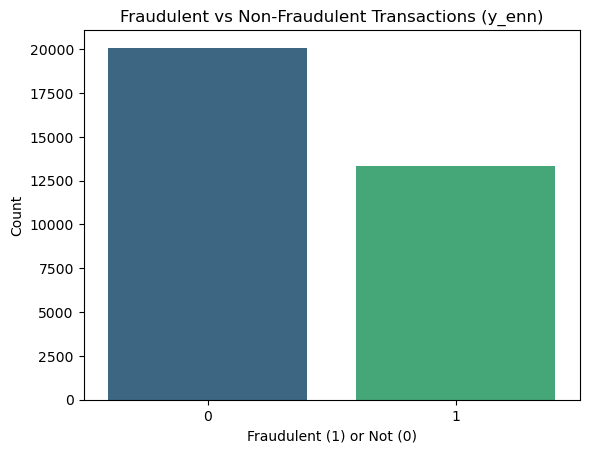

In [ ]:
#Visualises the distribution of fraudulent vs non-fraudulent transactions
sns.countplot(x=y_enn, palette='viridis')
plt.title('Fraudulent vs Non-Fraudulent Transactions (y_enn)')
plt.xlabel('Fraudulent (1) or Not (0)')
plt.ylabel('Count')
plt.show()


Here this plot shows the count of fraudulent (1) and non-fraudulent (0)transactions in the dataset. The balance reflects the effect of resampling techniques like undersampling and Tomek Links to address class imbalance in the original data. This imbalance is crucial for model development, as it may require techniques such as resampling or adjustment to ensure accurate fraud detection.

In [ ]:
print(f"Original Dataset Shape: {df_cleaned.shape}")
print(f"Resampled Dataset Shape: {X_enn.shape}")
print(f"Feature Columns: {X.columns.tolist()}")
print(f"Target Distribution:\n{y.value_counts()}")

Original Dataset Shape: (8914963, 17)
Resampled Dataset Shape: (33418, 47)
Feature Columns: ['amount', 'current_age', 'retirement_age', 'per_capita_income', 'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards', 'num_cards_issued', 'credit_limit', 'use_chip_Chip Transaction', 'use_chip_Online Transaction', 'use_chip_Swipe Transaction', 'gender_Female', 'gender_Male', 'errors_Bad CVV', 'errors_Bad CVV,Insufficient Balance', 'errors_Bad CVV,Technical Glitch', 'errors_Bad Card Number', 'errors_Bad Card Number,Bad CVV', 'errors_Bad Card Number,Bad Expiration', 'errors_Bad Card Number,Bad Expiration,Insufficient Balance', 'errors_Bad Card Number,Insufficient Balance', 'errors_Bad Card Number,Technical Glitch', 'errors_Bad Expiration', 'errors_Bad Expiration,Bad CVV', 'errors_Bad Expiration,Insufficient Balance', 'errors_Bad Expiration,Technical Glitch', 'errors_Bad PIN', 'errors_Bad PIN,Insufficient Balance', 'errors_Bad PIN,Technical Glitch', 'errors_Bad Zipcode', 'errors_Bad Z

This output compares the original dataset's shape with the resampled dataset's shape, highlighting the changes after applying Edited Nearest Neighbours (ENN). It also lists the feature columns used for analysis and provides the target distribution in the original dataset, showing the imbalance before resampling.

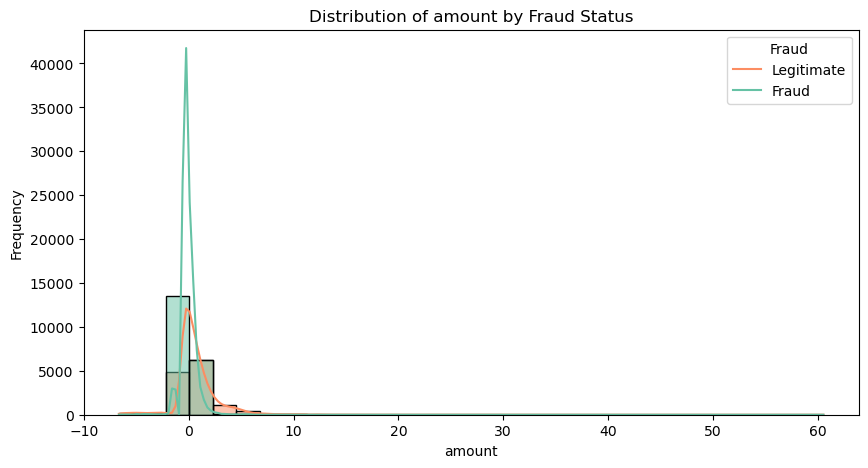

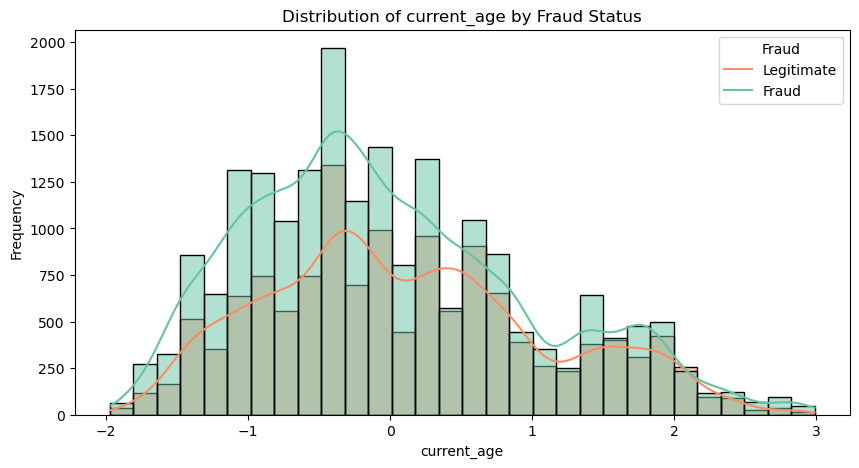

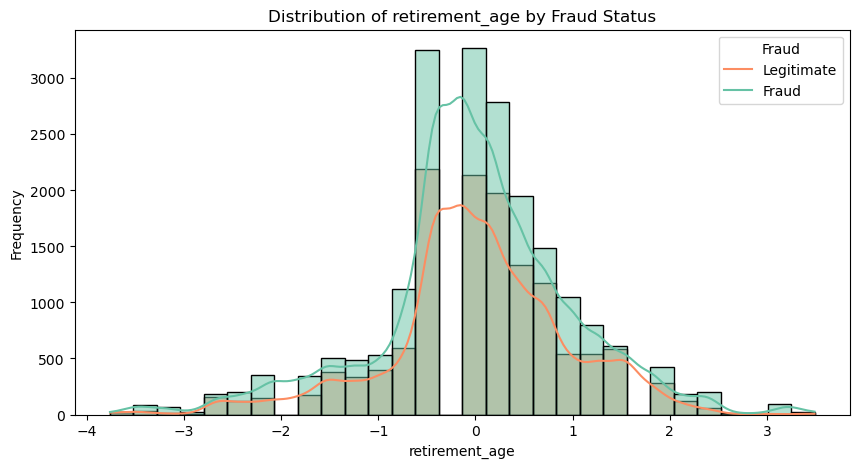

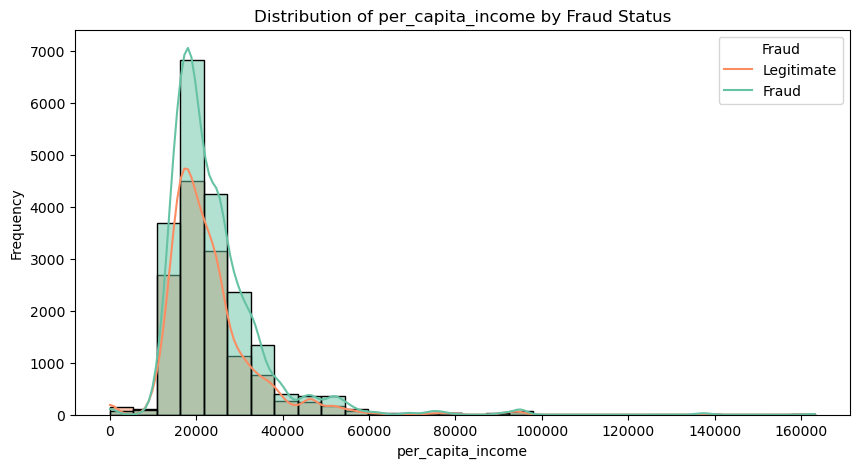

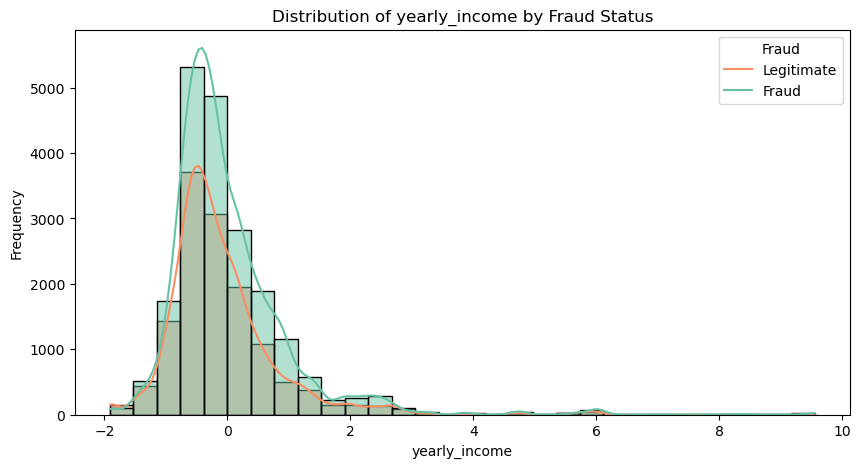

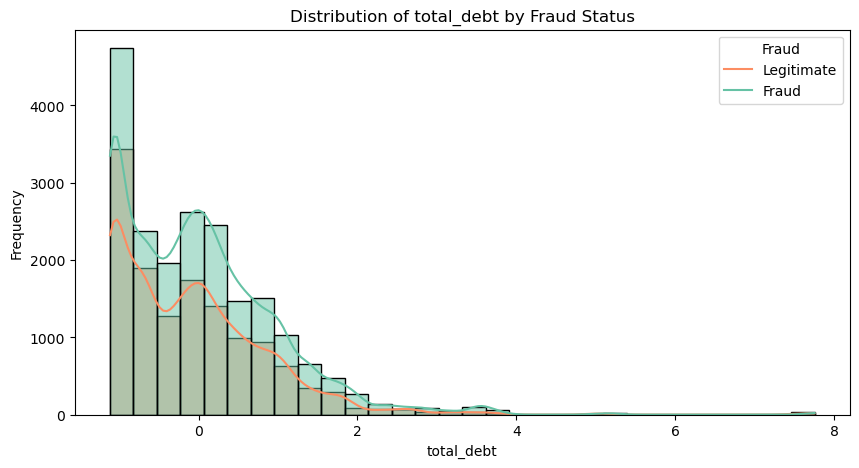

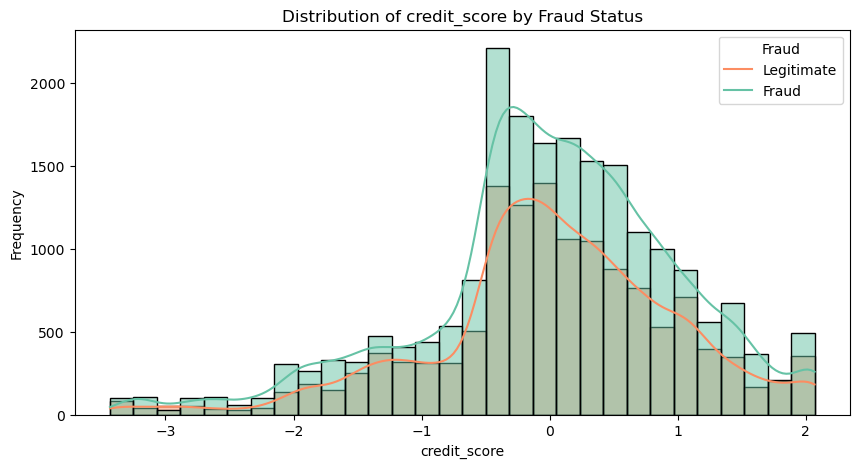

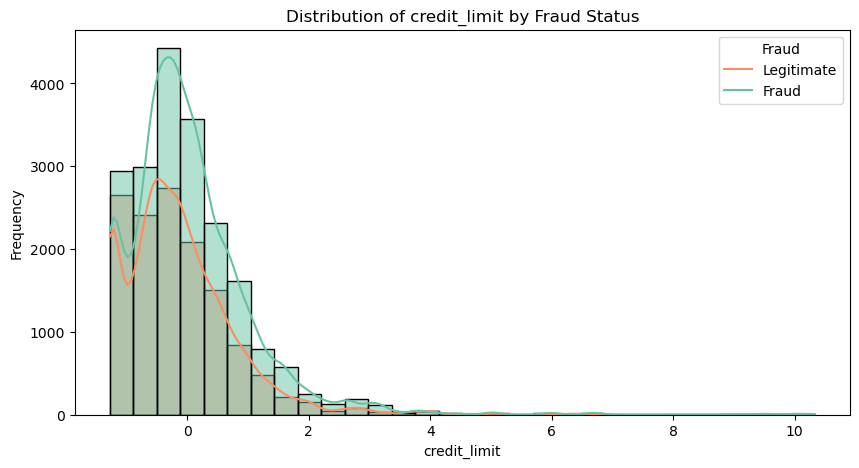

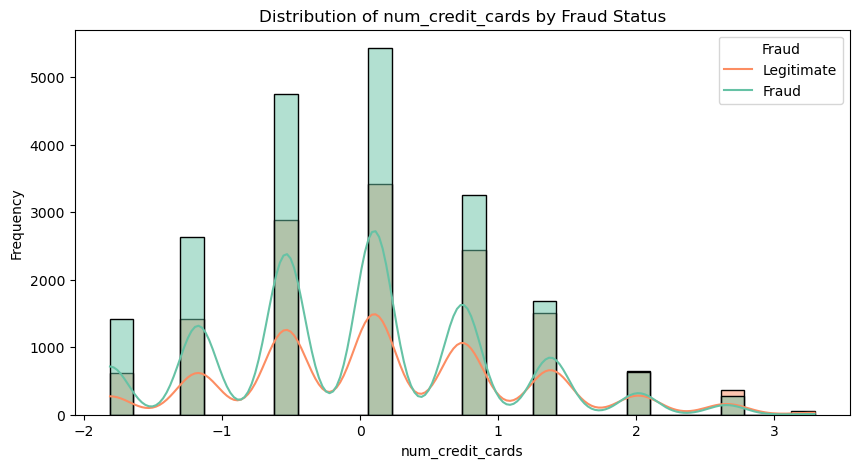

In [ ]:
#Best features
specific_features = [
    'amount', 'current_age', 'retirement_age', 'per_capita_income',
    'yearly_income', 'total_debt', 'credit_score', 'credit_limit', 'num_credit_cards'
]

resampled_data = pd.concat([X_enn, y_enn.rename('identifier')], axis=1)

# Distribution for each feature by fraud status
for col in specific_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=resampled_data, x=col, hue='identifier', kde=True, bins=30, palette="Set2")
    plt.title(f"Distribution of {col} by Fraud Status")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend(title='Fraud', labels=['Legitimate', 'Fraud'])
    plt.show()


These histograms visualise the distribution of key numerical features by fraud status (legitimate vs. fraudulent transactions). Each plot shows potential patterns, such as how transaction amounts, age, or credit limits vary between fraud and non-fraud cases, providing insights into feature importance for fraud detection. For example, in the amount graph, fraudulent transactions often cluster within certain ranges, highlighting patterns that can be used for fraud detection

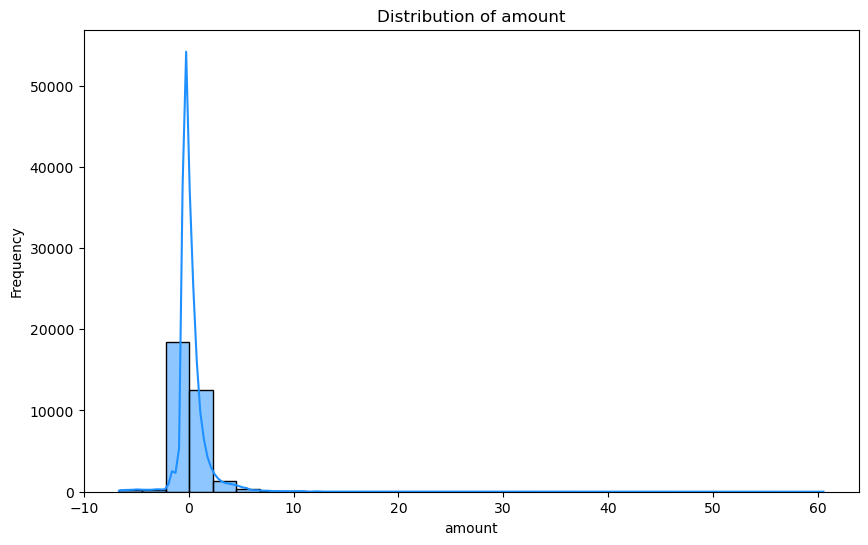

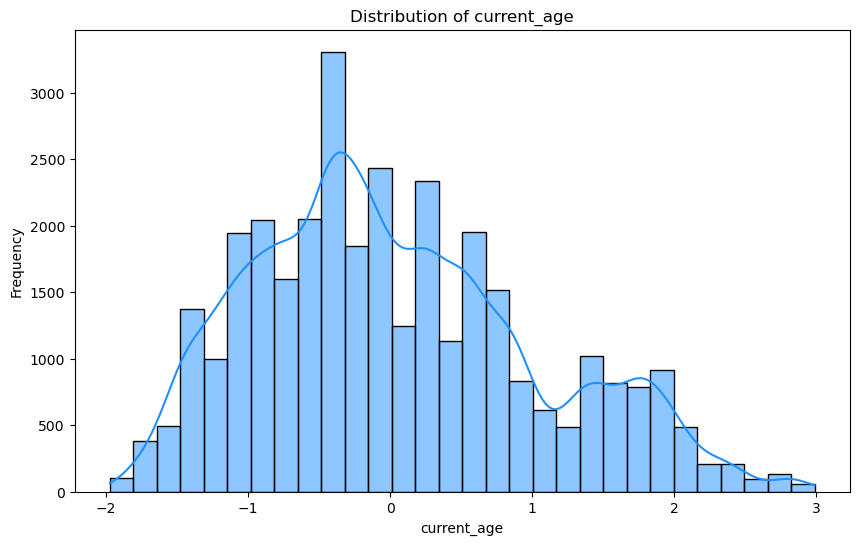

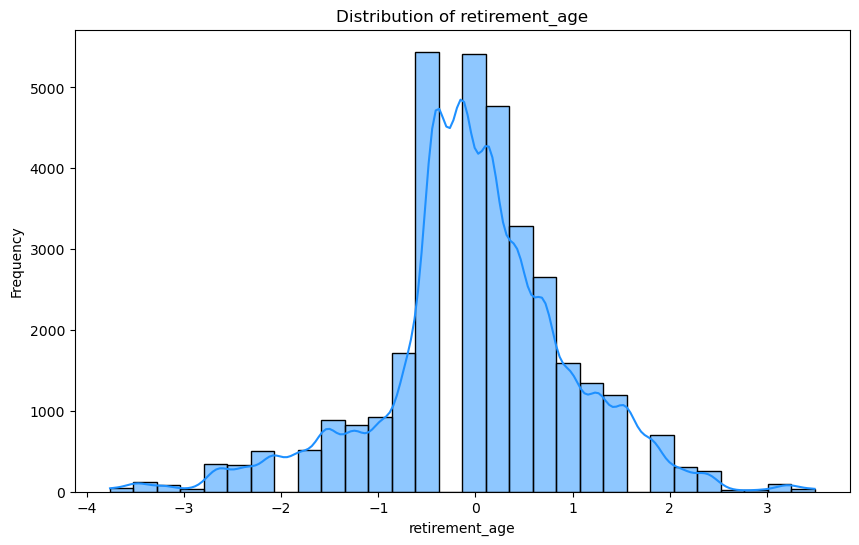

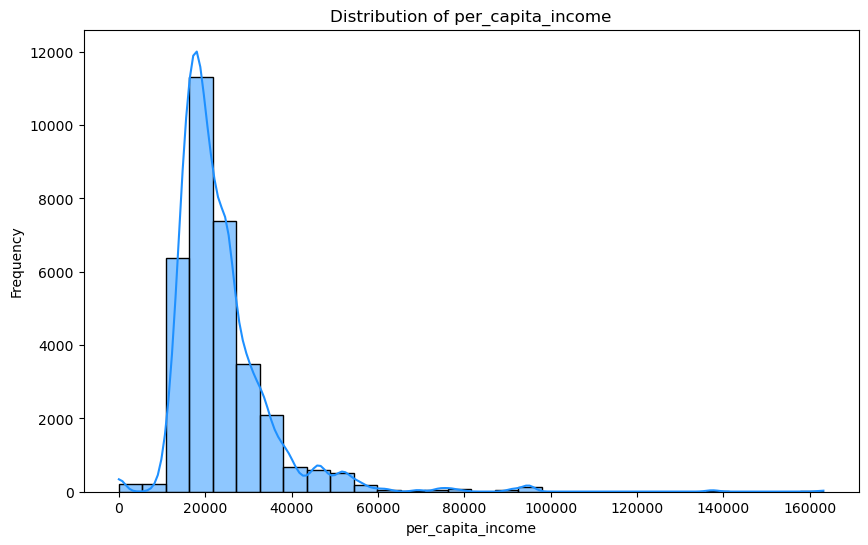

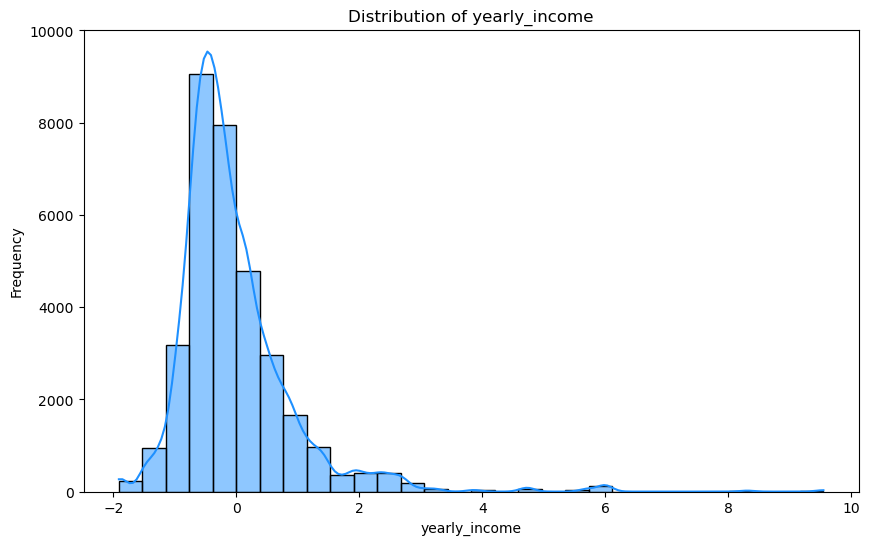

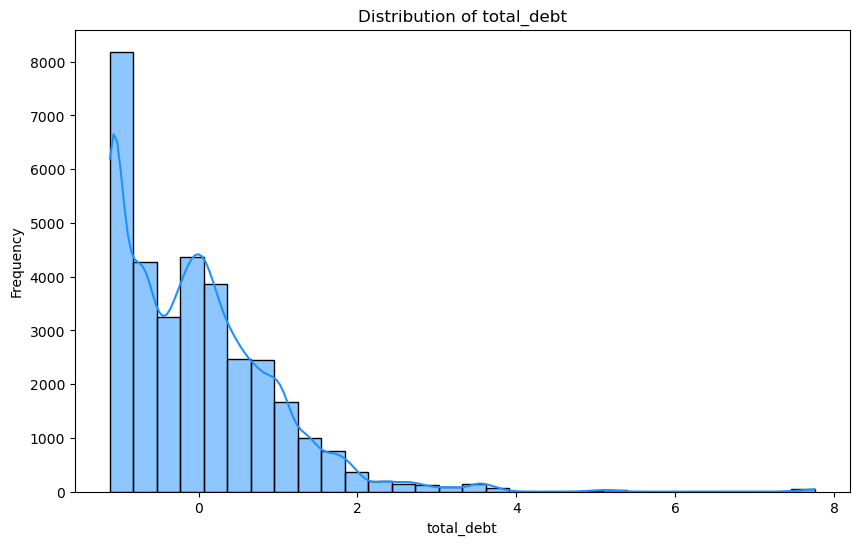

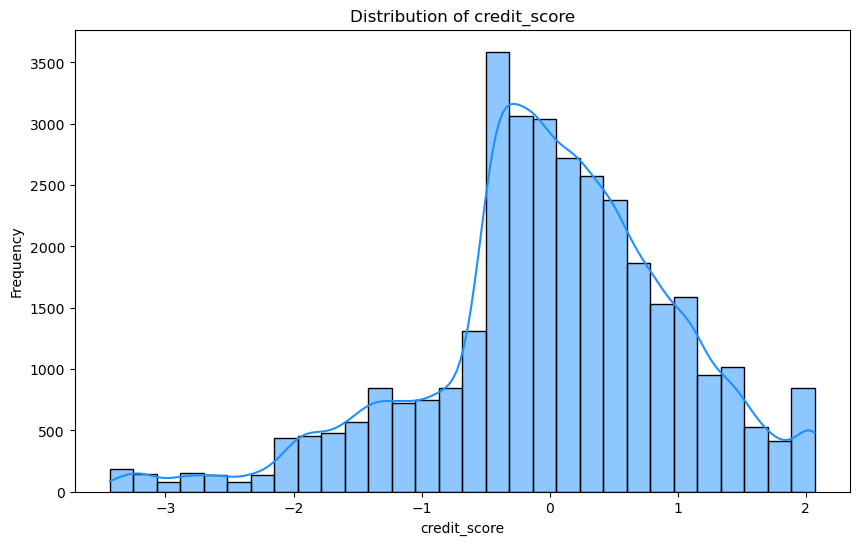

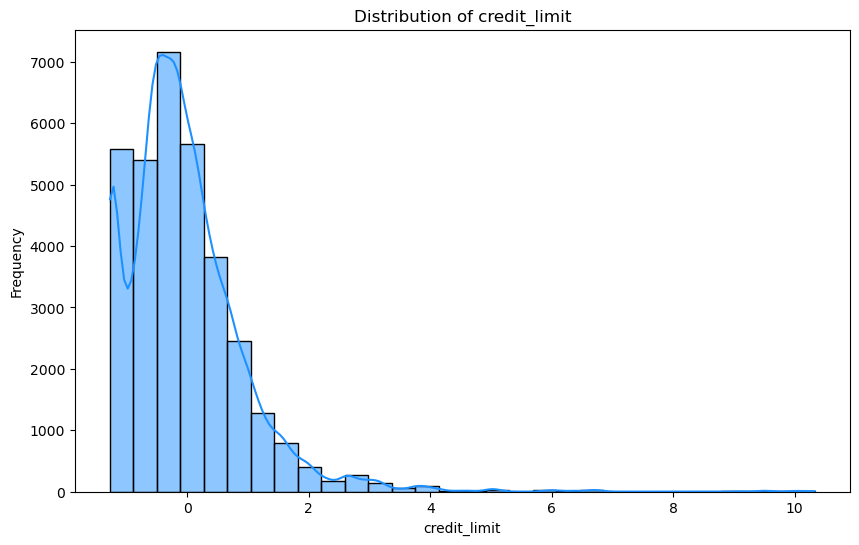

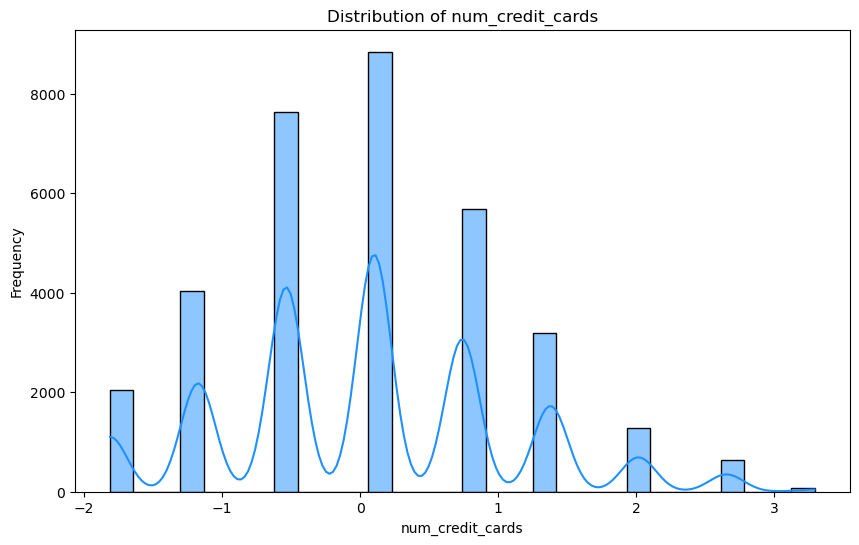

In [ ]:
features = ['amount', 'current_age', 'retirement_age', 'per_capita_income',
            'yearly_income', 'total_debt', 'credit_score', 'credit_limit', 'num_credit_cards']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(X_enn[feature], kde=True, color='dodgerblue', bins=30)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


These histograms show the overall distribution of selected numerical features in the resampled dataset, focusing on transaction-related and demographic attributes. Each plot provides insights into the underlying data characteristics, such as the skewness or concentration of values. For instance, the amount histogram shows a high frequency of smaller transaction values, reflecting a potential trend in spending patterns, while the credit_score distribution suggests that most values cluster around certain ranges, which might be useful for understanding fraud detection thresholds.

/tmp/ipykernel_172425/3621492742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_enn, y=X_enn[feature], palette="coolwarm")


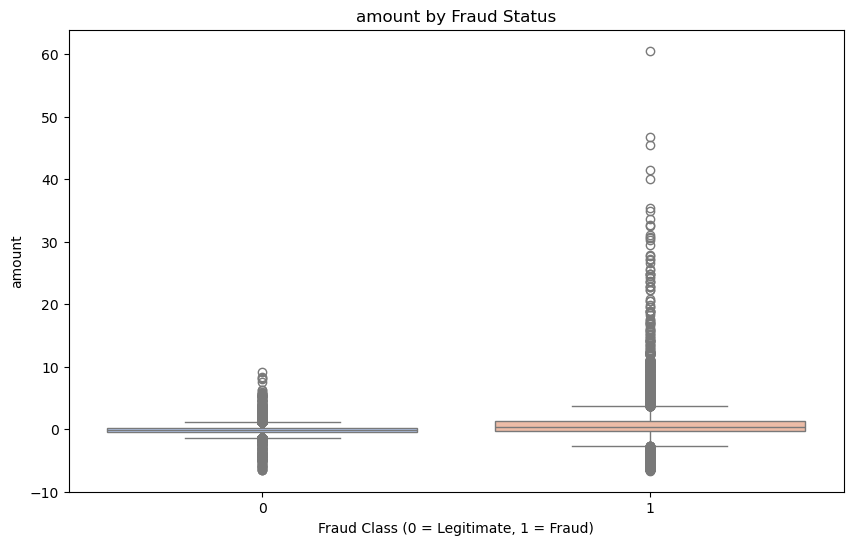

/tmp/ipykernel_172425/3621492742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_enn, y=X_enn[feature], palette="coolwarm")


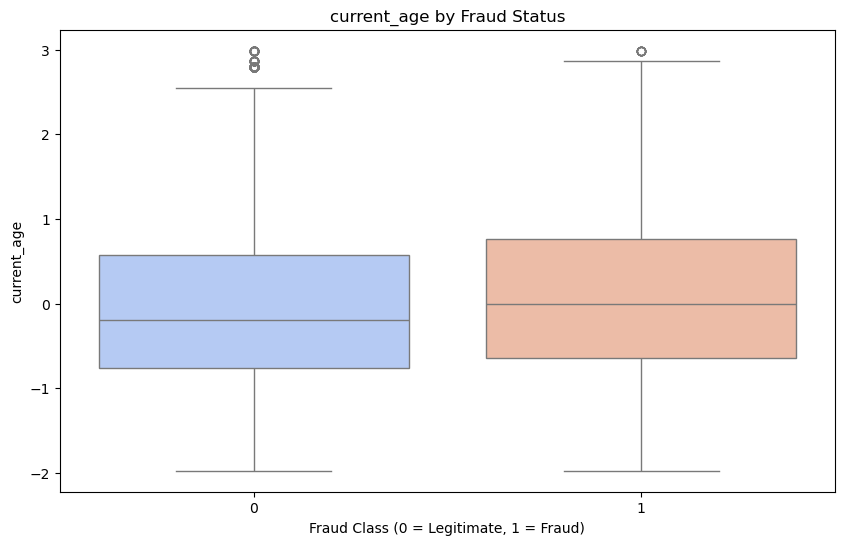

/tmp/ipykernel_172425/3621492742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_enn, y=X_enn[feature], palette="coolwarm")


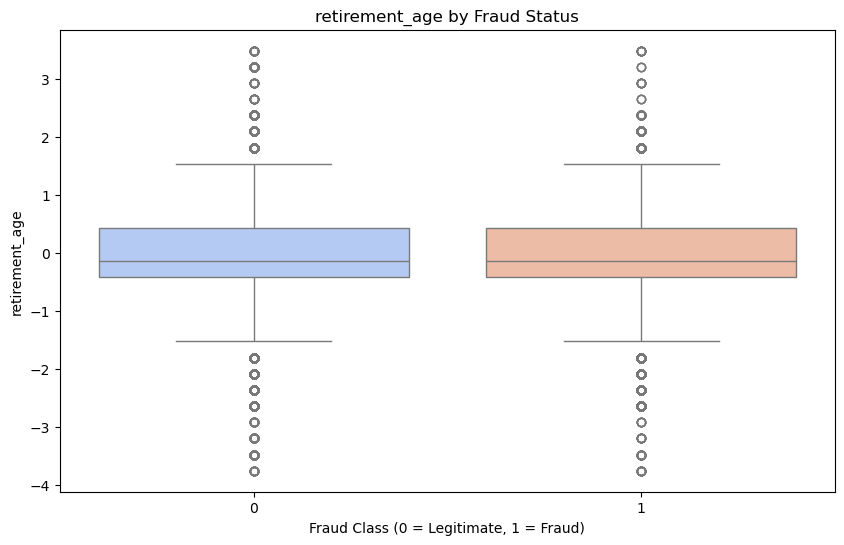

/tmp/ipykernel_172425/3621492742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_enn, y=X_enn[feature], palette="coolwarm")


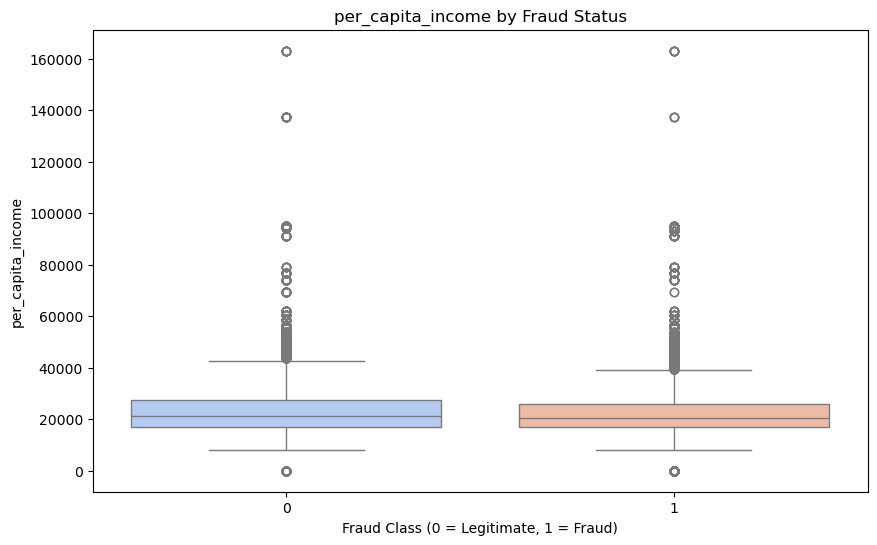

/tmp/ipykernel_172425/3621492742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_enn, y=X_enn[feature], palette="coolwarm")


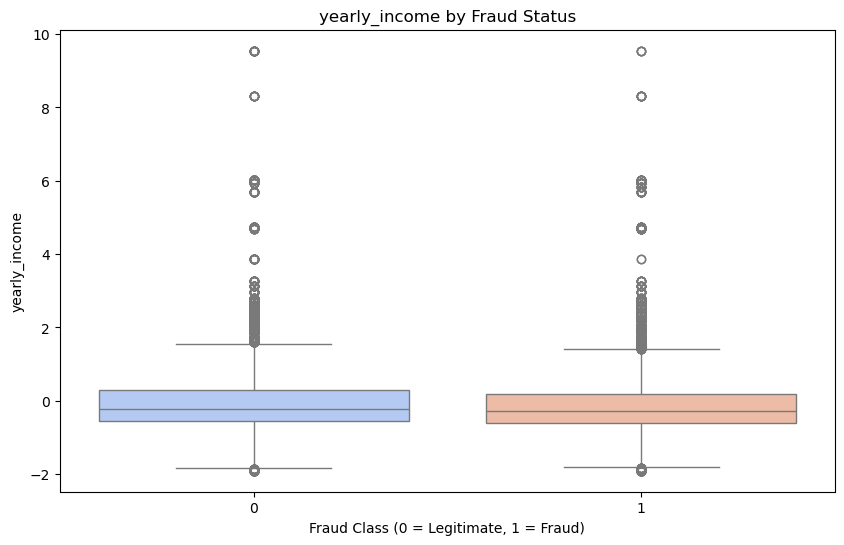

/tmp/ipykernel_172425/3621492742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_enn, y=X_enn[feature], palette="coolwarm")


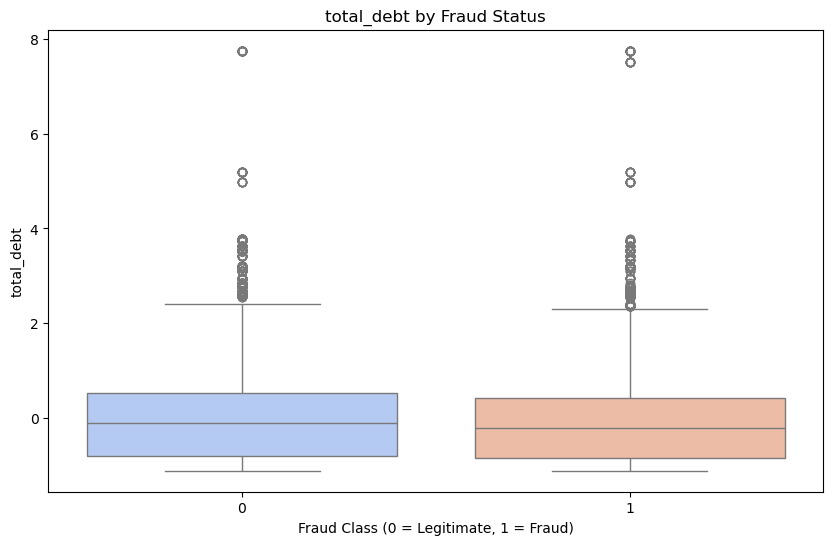

/tmp/ipykernel_172425/3621492742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_enn, y=X_enn[feature], palette="coolwarm")


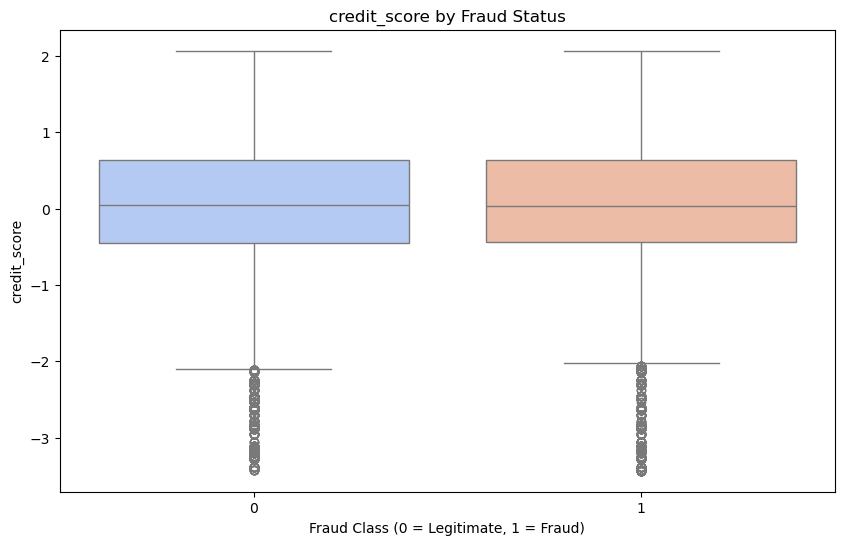

/tmp/ipykernel_172425/3621492742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_enn, y=X_enn[feature], palette="coolwarm")


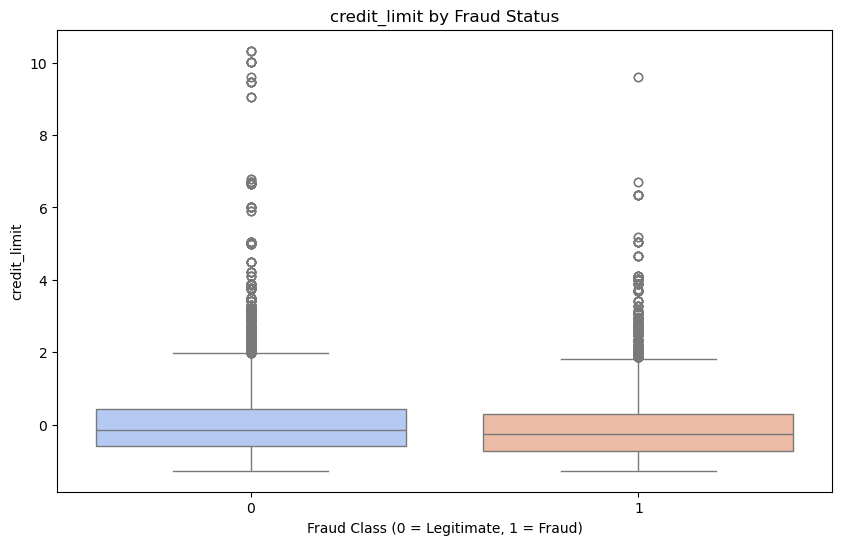

/tmp/ipykernel_172425/3621492742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_enn, y=X_enn[feature], palette="coolwarm")


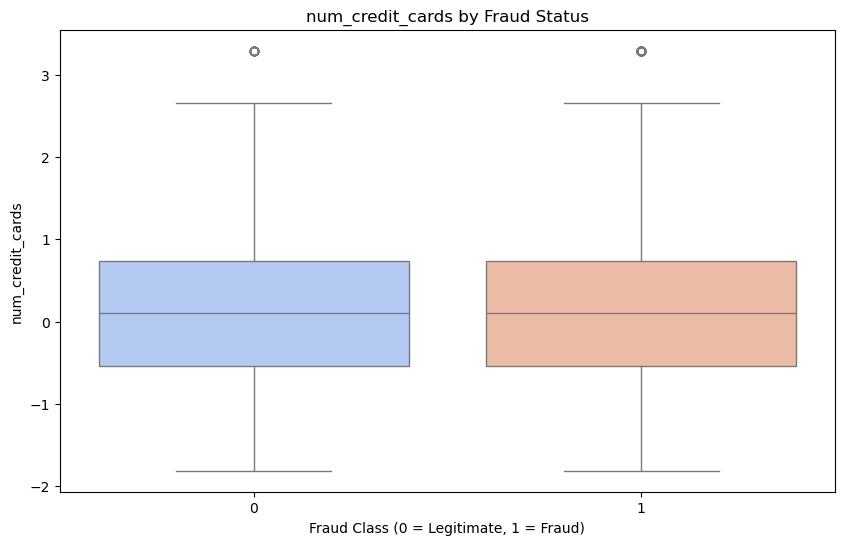

In [ ]:
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=y_enn, y=X_enn[feature], palette="coolwarm")
    plt.title(f"{feature} by Fraud Status")
    plt.xlabel("Fraud Class (0 = Legitimate, 1 = Fraud)")
    plt.ylabel(feature)
    plt.show()


These boxplots compare the distribution of each numerical feature across fraud classes (legitimate vs. fraudulent transactions). They highlight differences in central tendency, spread, and outliers between the two classes. For example, the boxplot for amount may reveal higher median values or a wider range for fraudulent transactions, meaning that transaction amount is an important factor for fraud detection. Similarly, features like credit_score may show a shift in medians or variability, giving additional insights into patterns related to fraud.

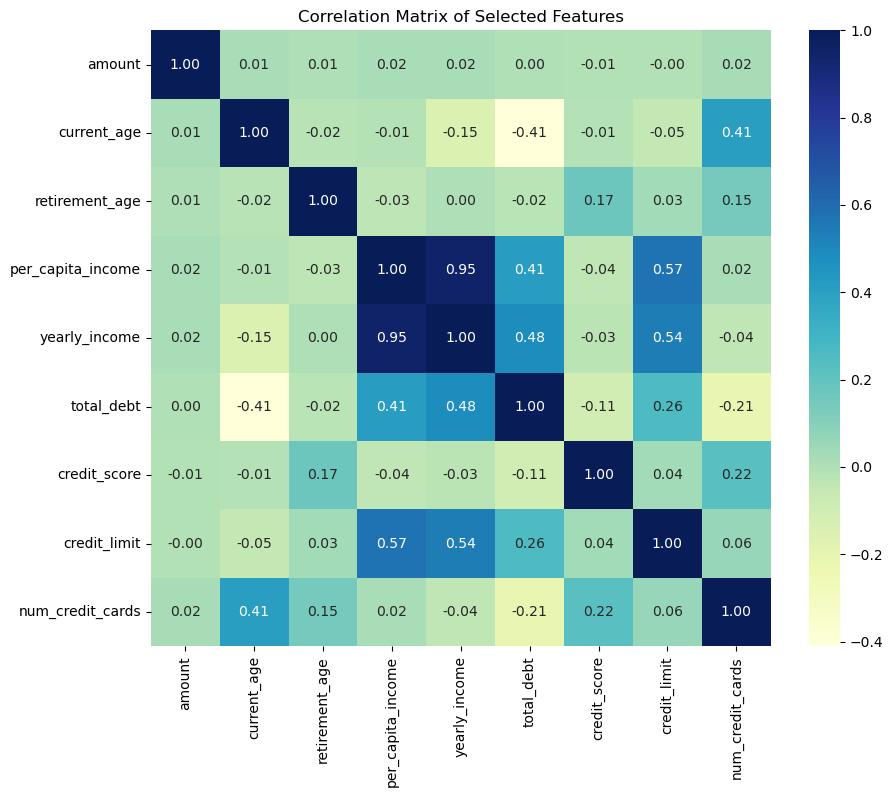

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = X_enn[features].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Correlation Matrix of Selected Features")
plt.show()


This heatmap visualises the correlation between key numerical features in the resampled dataset. It helps identify relationships between features, such as how strongly transaction amounts might correlate with credit limits or income. For example, we might observe that credit_limit and yearly_income are highly correlated, suggesting that higher-income individuals may have higher credit limits, which could influence fraud detection models. Meaning such correlations is crucial for feature selection and understanding the underlying patterns in the data.

Bins/Buckets;

Binning helps make histograms and bar plots more informative.

Grouping continuous variables allows easier observation of trends with categorical variables (e.g., fraud status).

Binning reduces noise from small fluctuations in data.

/tmp/ipykernel_172425/747432679.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate_by_bucket = resampled_data.groupby('amount_bucket')['identifier'].mean()


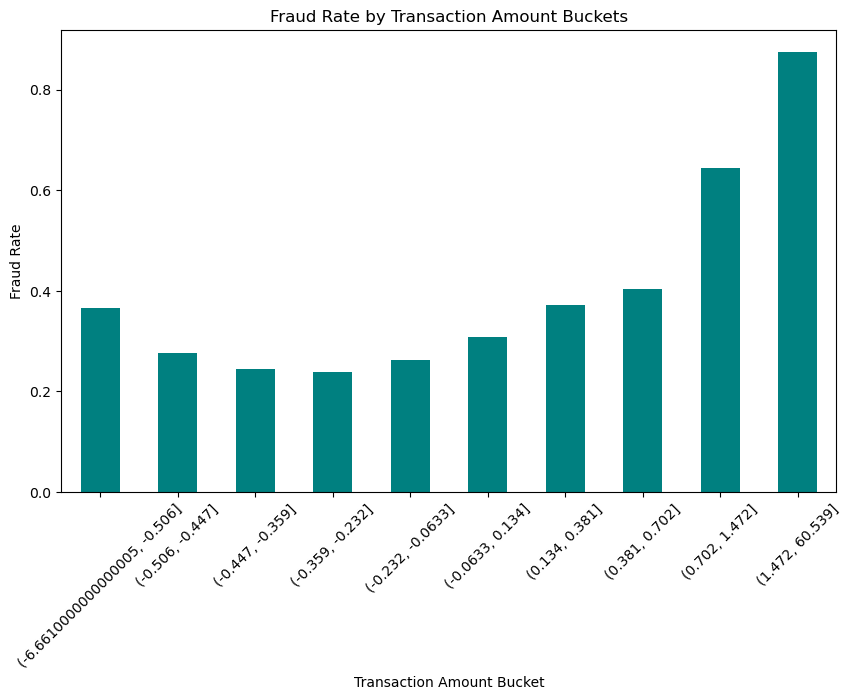

In [ ]:
#Fraud rates across different transaction amount buckets.
#divides amount feature into 10 quantiles,
#then calculate the fraud rate for each bucket (by averaging the identifier column within each bucket).

resampled_data['amount_bucket'] = pd.qcut(X_enn['amount'], q=10)
fraud_rate_by_bucket = resampled_data.groupby('amount_bucket')['identifier'].mean()

fraud_rate_by_bucket.plot(kind='bar', color='teal', figsize=(10, 6))
plt.title("Fraud Rate by Transaction Amount Buckets")
plt.xlabel("Transaction Amount Bucket")
plt.ylabel("Fraud Rate")
plt.xticks(rotation=45)
plt.show()



This bar chart shows the fraud rate across different transaction amount buckets. The amount feature is divided into 10 quantiles, and the fraud rate is calculated by averaging the identifier column within each bucket. The chart reveals patterns such as whether certain transaction amounts are more prone to fraudulent activity. For example, higher fraud rates might be observed in lower or higher transaction amount buckets, suggesting that fraud detection models can use transaction amounts to differ between legitimate and fraudulent transactions.

/tmp/ipykernel_172425/976767031.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=resampled_data, x='identifier', y=col, palette="Set2", split=True)


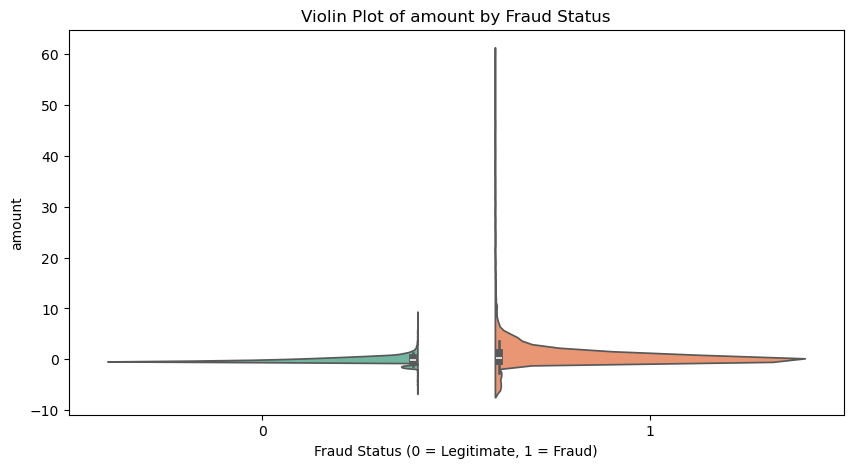

/tmp/ipykernel_172425/976767031.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=resampled_data, x='identifier', y=col, palette="Set2", split=True)


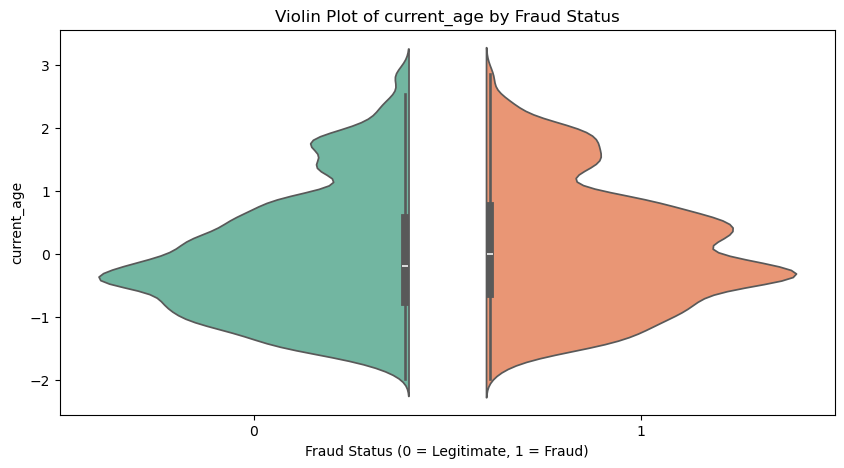

/tmp/ipykernel_172425/976767031.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=resampled_data, x='identifier', y=col, palette="Set2", split=True)


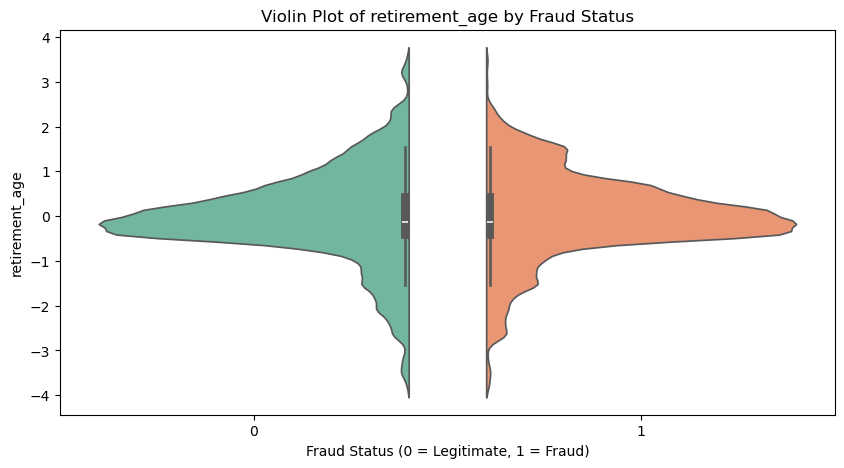

/tmp/ipykernel_172425/976767031.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=resampled_data, x='identifier', y=col, palette="Set2", split=True)


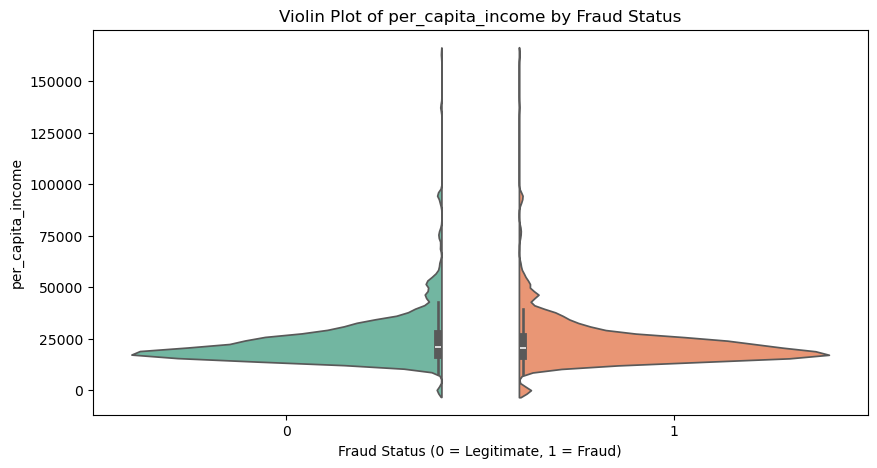

/tmp/ipykernel_172425/976767031.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=resampled_data, x='identifier', y=col, palette="Set2", split=True)


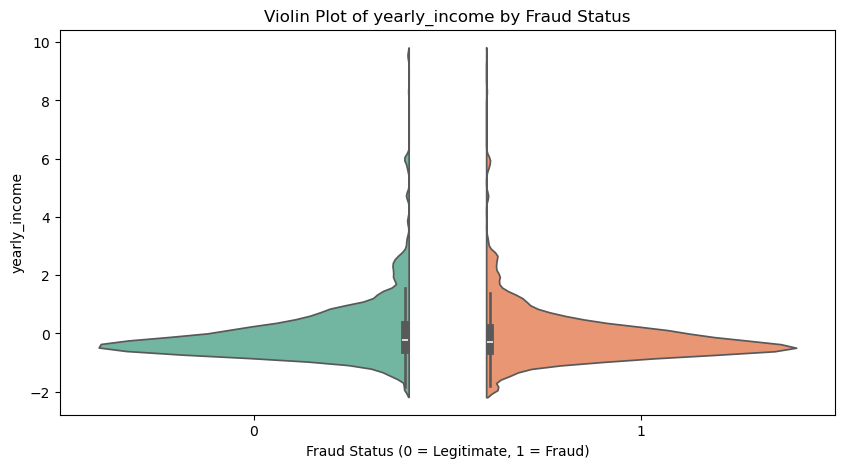

/tmp/ipykernel_172425/976767031.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=resampled_data, x='identifier', y=col, palette="Set2", split=True)


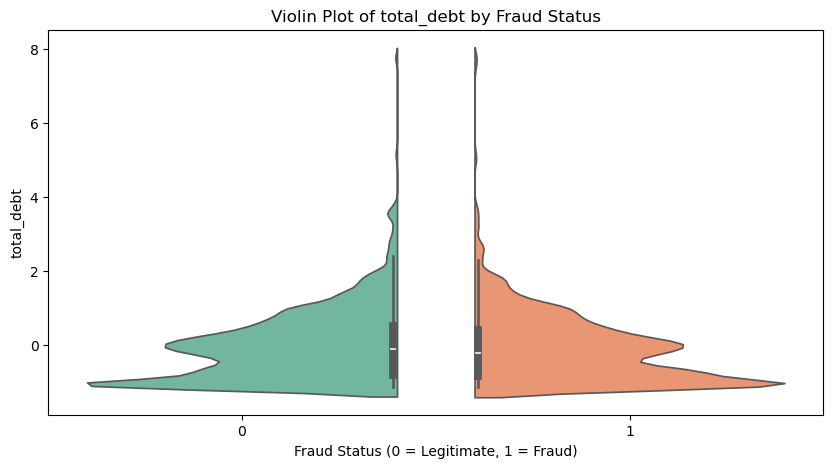

/tmp/ipykernel_172425/976767031.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=resampled_data, x='identifier', y=col, palette="Set2", split=True)


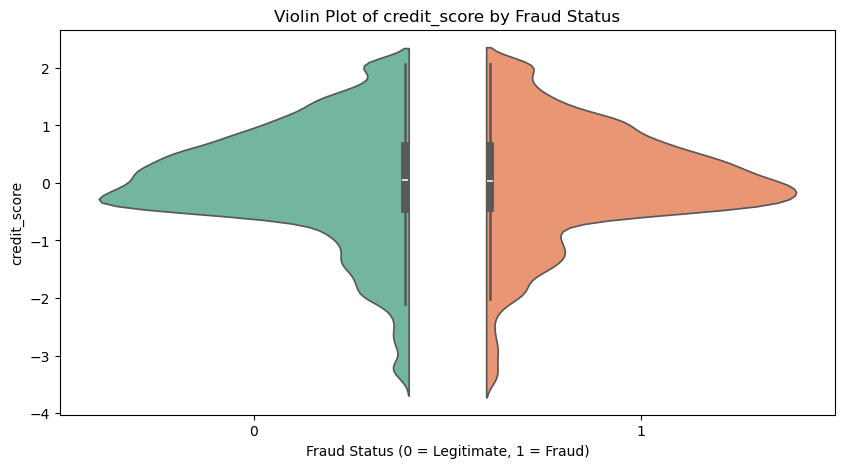

/tmp/ipykernel_172425/976767031.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=resampled_data, x='identifier', y=col, palette="Set2", split=True)


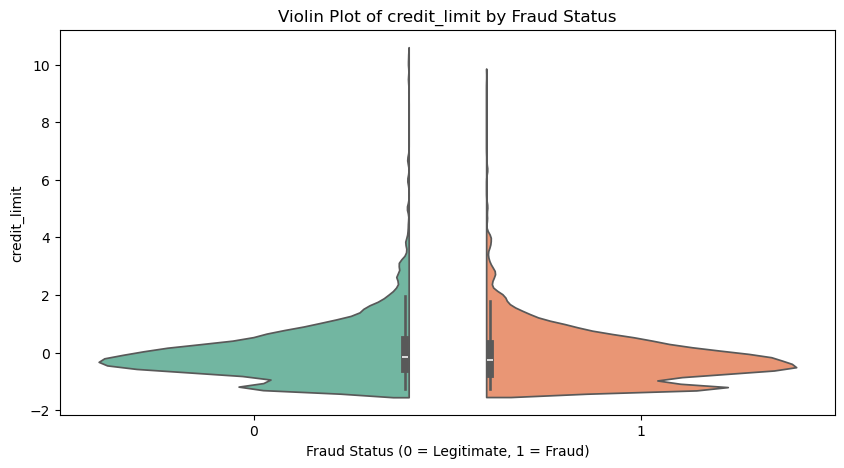

/tmp/ipykernel_172425/976767031.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=resampled_data, x='identifier', y=col, palette="Set2", split=True)


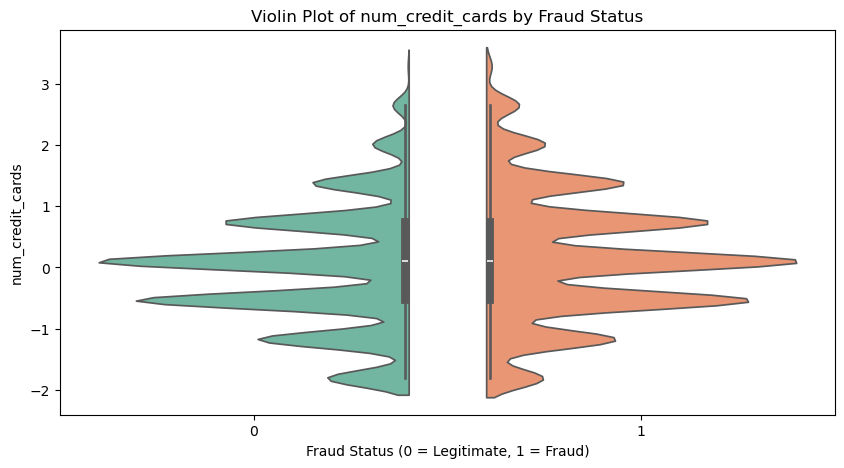

In [ ]:
for col in specific_features:
    plt.figure(figsize=(10, 5))
    sns.violinplot(data=resampled_data, x='identifier', y=col, palette="Set2", split=True)
    plt.title(f"Violin Plot of {col} by Fraud Status")
    plt.xlabel("Fraud Status (0 = Legitimate, 1 = Fraud)")
    plt.ylabel(col)
    plt.show()


These violin plots compare the distribution of key features by fraud status, giving insights into the data's spread, density, and central tendency. For example, the amount violin plot may show that fraudulent transactions have a narrower range of amounts, indicating that fraud tends to occur within specific transaction value ranges. Similarly, features like credit_score or total_debt may show distinct distributions between legitimate and fraudulent transactions, helping identify patterns that are important for distinguishing fraud cases from legitimate ones.

/tmp/ipykernel_172425/979957701.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_over_time = resampled_data.groupby('amount_bins')['identifier'].mean()


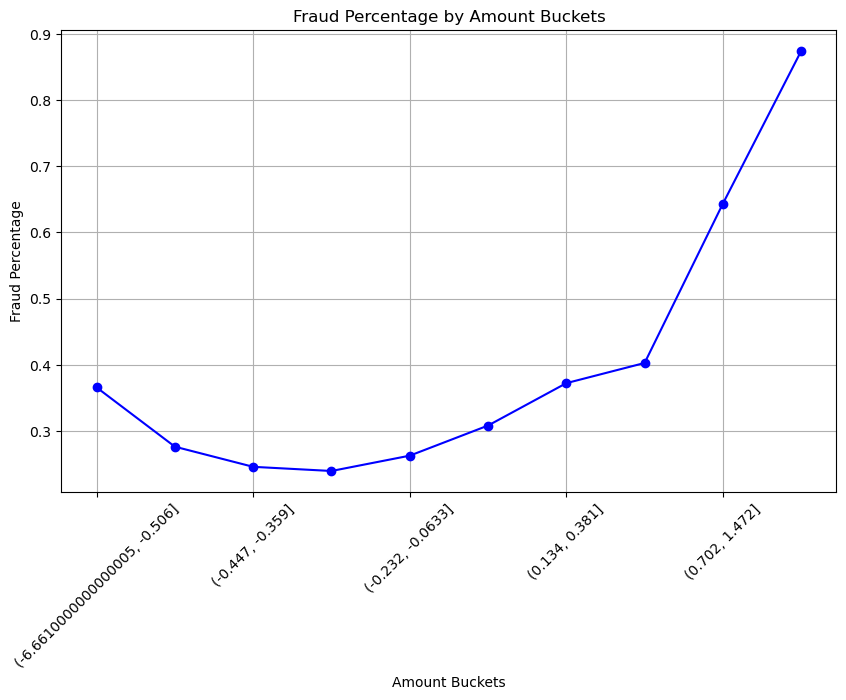

In [ ]:
#line plot of the fraud percentage across different transaction amount ranges (bins).
#divides the transaction amounts into 10 quantile-based bins,
#calculates the fraud rate (percentage of fraudulent transactions) for each bin,
#and then plots this data to show how fraud risk varies with the transaction amount.

resampled_data['amount_bins'] = pd.qcut(resampled_data['amount'], q=10)
fraud_over_time = resampled_data.groupby('amount_bins')['identifier'].mean()

plt.figure(figsize=(10, 6))
fraud_over_time.plot(kind='line', marker='o', color='blue')
plt.title("Fraud Percentage by Amount Buckets")
plt.xlabel("Amount Buckets")
plt.ylabel("Fraud Percentage")
plt.xticks(rotation=45)
plt.grid()
plt.show()


This line plot visualises the fraud percentage across different transaction amount ranges (bins). The amount feature is divided into 10 quantiles, and the fraud rate is calculated for each bin. The plot shows how fraud risk varies with transaction amounts, potentially indicating that certain transaction ranges, whether low or high, are more prone to fraud. For example, higher fraud percentages in smaller or larger transaction amounts could help inform fraud detection strategies that focus on specific transaction value ranges.

/tmp/ipykernel_172425/2227758341.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_enn[feature][y_enn == 0], label='Legitimate', color='green', shade=True)
/tmp/ipykernel_172425/2227758341.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_enn[feature][y_enn == 1], label='Fraud', color='red', shade=True)


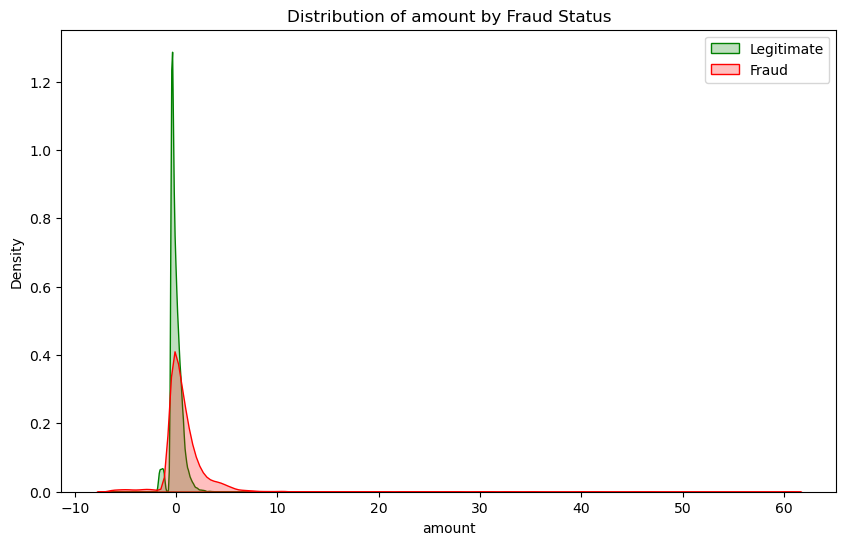

/tmp/ipykernel_172425/2227758341.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_enn[feature][y_enn == 0], label='Legitimate', color='green', shade=True)
/tmp/ipykernel_172425/2227758341.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_enn[feature][y_enn == 1], label='Fraud', color='red', shade=True)


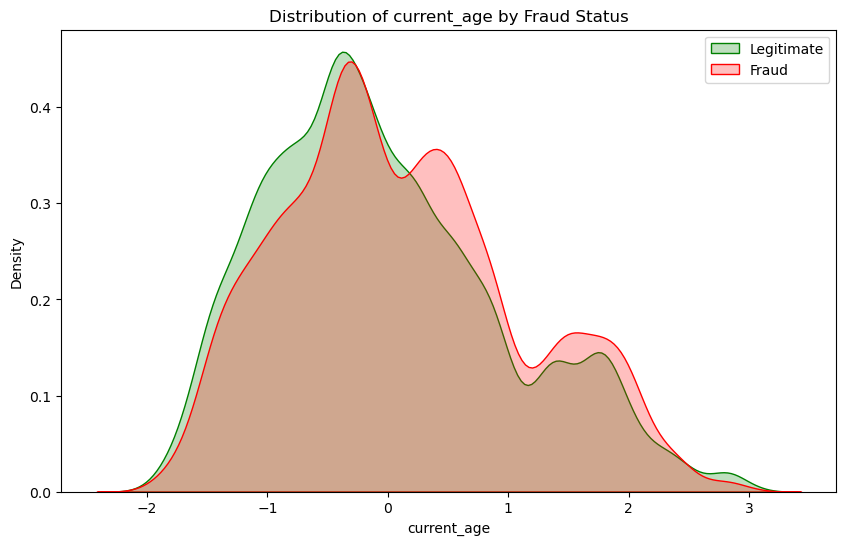

/tmp/ipykernel_172425/2227758341.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_enn[feature][y_enn == 0], label='Legitimate', color='green', shade=True)
/tmp/ipykernel_172425/2227758341.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_enn[feature][y_enn == 1], label='Fraud', color='red', shade=True)


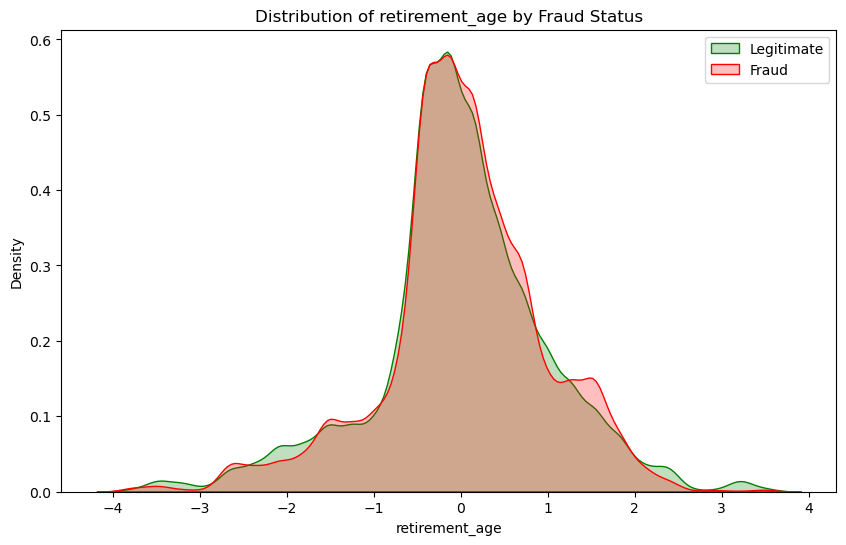

/tmp/ipykernel_172425/2227758341.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_enn[feature][y_enn == 0], label='Legitimate', color='green', shade=True)
/tmp/ipykernel_172425/2227758341.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_enn[feature][y_enn == 1], label='Fraud', color='red', shade=True)


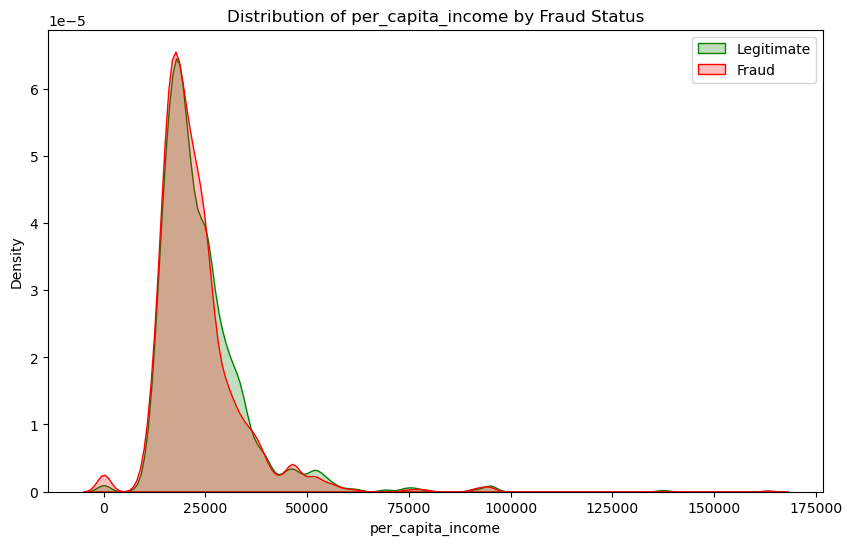

/tmp/ipykernel_172425/2227758341.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_enn[feature][y_enn == 0], label='Legitimate', color='green', shade=True)
/tmp/ipykernel_172425/2227758341.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_enn[feature][y_enn == 1], label='Fraud', color='red', shade=True)


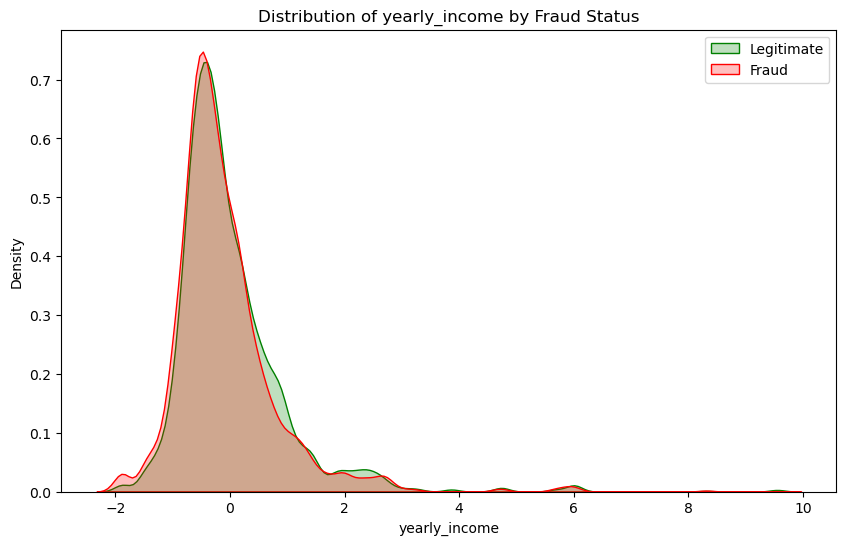

/tmp/ipykernel_172425/2227758341.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_enn[feature][y_enn == 0], label='Legitimate', color='green', shade=True)
/tmp/ipykernel_172425/2227758341.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_enn[feature][y_enn == 1], label='Fraud', color='red', shade=True)


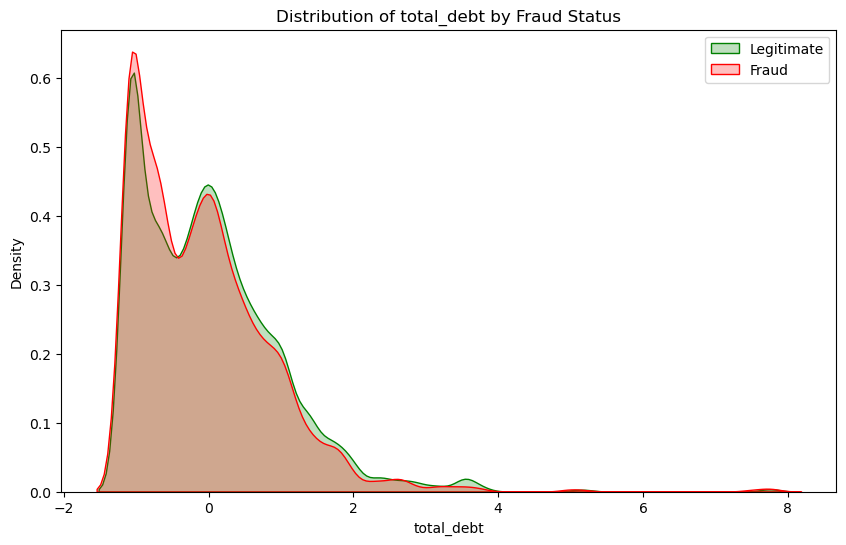

/tmp/ipykernel_172425/2227758341.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_enn[feature][y_enn == 0], label='Legitimate', color='green', shade=True)
/tmp/ipykernel_172425/2227758341.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_enn[feature][y_enn == 1], label='Fraud', color='red', shade=True)


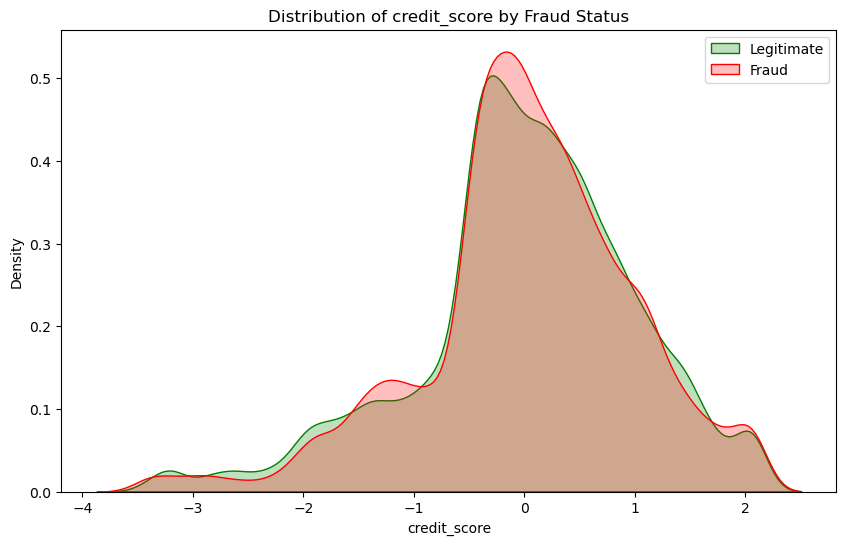

/tmp/ipykernel_172425/2227758341.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_enn[feature][y_enn == 0], label='Legitimate', color='green', shade=True)
/tmp/ipykernel_172425/2227758341.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_enn[feature][y_enn == 1], label='Fraud', color='red', shade=True)


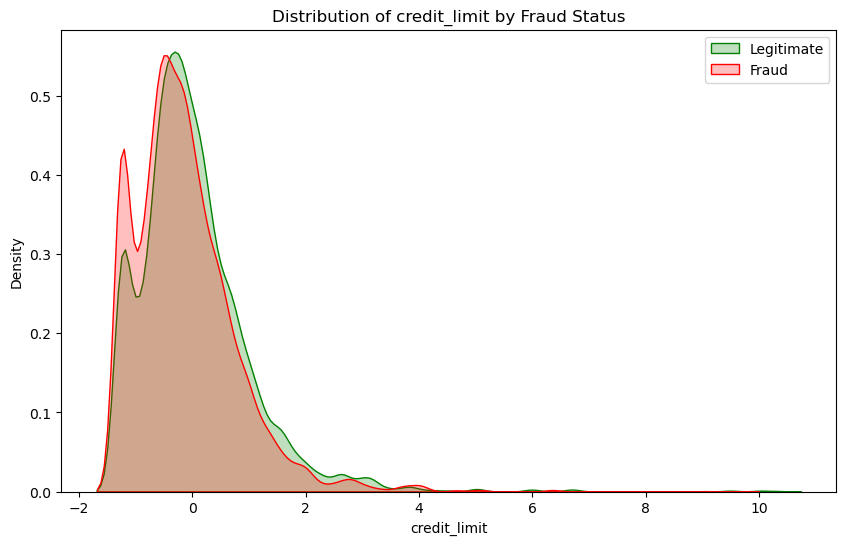

/tmp/ipykernel_172425/2227758341.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_enn[feature][y_enn == 0], label='Legitimate', color='green', shade=True)
/tmp/ipykernel_172425/2227758341.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_enn[feature][y_enn == 1], label='Fraud', color='red', shade=True)


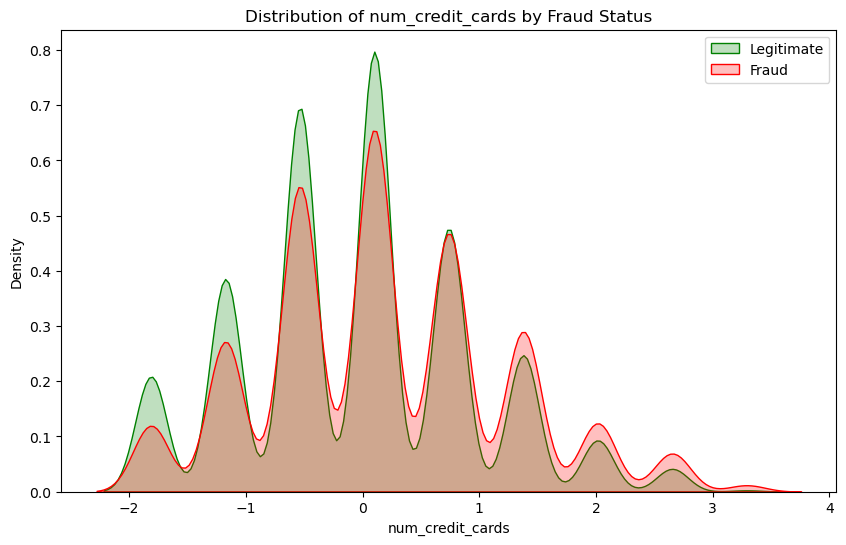

In [ ]:
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(X_enn[feature][y_enn == 0], label='Legitimate', color='green', shade=True)
    sns.kdeplot(X_enn[feature][y_enn == 1], label='Fraud', color='red', shade=True)
    plt.title(f"Distribution of {feature} by Fraud Status")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

These kernel density estimate (KDE) plots compare the distribution of each feature by fraud status (legitimate vs. fraudulent transactions). The shaded areas represent the density of each feature for legitimate and fraudulent transactions. For example, the credit_score KDE plot may show that fraudulent transactions have lower credit scores, while legitimate transactions have a broader range. These plots help highlight subtle differences in the feature distributions that could aid in building more effective fraud detection models.

/tmp/ipykernel_172425/539056653.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  debt_fraud_summary = resampled_data.groupby(debt_bins)['identifier'].value_counts(normalize=True).unstack()


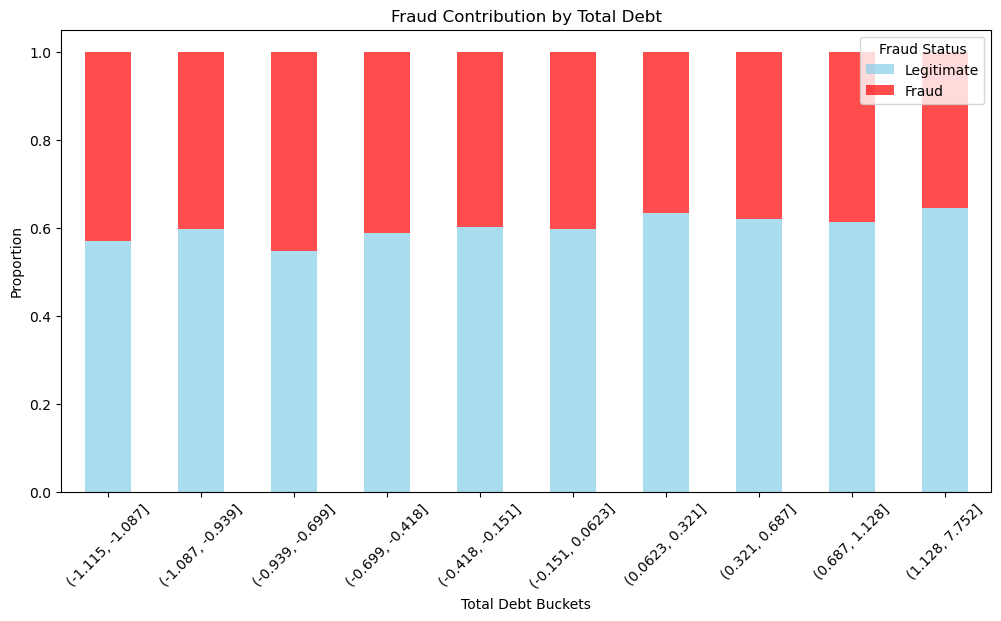

In [ ]:
#Fraud rates with total debt by dividing the total_debt feature into 10 equal-sized buckets.
#It then calculates the proportion of fraudulent and legitimate transactions within each debt bucket

debt_bins = pd.qcut(resampled_data['total_debt'], q=10)
debt_fraud_summary = resampled_data.groupby(debt_bins)['identifier'].value_counts(normalize=True).unstack()

debt_fraud_summary.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'red'], alpha=0.7)
plt.title("Fraud Contribution by Total Debt")
plt.xlabel("Total Debt Buckets")
plt.ylabel("Proportion")
plt.legend(title="Fraud Status", labels=["Legitimate", "Fraud"])
plt.xticks(rotation=45)
plt.show()


This stacked bar chart visualises the proportion of fraudulent and legitimate transactions across different total debt buckets. The total_debt feature is divided into 10 equal-sized quantiles, and the fraud rate is calculated for each bucket. The chart reveals how the likelihood of fraud changes with the amount of total debt. For example, higher levels of debt might correlate with an increased risk of fraud, which can provide valuable insights for fraud detection models, particularly in targeting high-risk debt categories.

In [ ]:
# Check shapes of X_enn and y_enn
print("Shape of Features (X_enn):", X_enn.shape)
print("Shape of Target (y_enn):", y_enn.shape)

# Summary statistics for X_enn
print("\nSummary Statistics for Features:")
print(X_enn.describe())

# Target variable distribution
from collections import Counter
print("\nTarget Distribution:")
print(Counter(y_enn))


Shape of Features (X_enn): (33418, 47)
Shape of Target (y_enn): (33418,)

Summary Statistics for Features:
             amount   current_age  retirement_age  per_capita_income  \
count  33418.000000  33418.000000    33418.000000       33418.000000   
mean       0.278673      0.034761        0.001249       23572.806631   
std        1.799055      0.997219        0.987270       11366.916720   
min       -6.659789     -1.972778       -3.760092           0.000000   
25%       -0.404646     -0.700899       -0.414757       16985.000000   
50%       -0.063285     -0.128553       -0.135979       20983.000000   
75%        0.528057      0.634574        0.421577       26674.000000   
max       60.538595      2.987550        3.488134      163145.000000   

       yearly_income    total_debt  credit_score  num_credit_cards  \
count   33418.000000  33418.000000  33418.000000      33418.000000   
mean       -0.036095     -0.030990      0.012164          0.044376   
std         0.957298      0.972925

In [ ]:
print(f"Original Dataset Shape: {df_cleaned.shape}")
print(f"Resampled Dataset Shape: {X_enn.shape}")
print(f"Feature Columns: {X.columns.tolist()}")
print(f"Target Distribution:\n{y.value_counts()}")

Original Dataset Shape: (8914963, 17)
Resampled Dataset Shape: (33418, 47)
Feature Columns: ['amount', 'current_age', 'retirement_age', 'per_capita_income', 'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards', 'num_cards_issued', 'credit_limit', 'use_chip_Chip Transaction', 'use_chip_Online Transaction', 'use_chip_Swipe Transaction', 'gender_Female', 'gender_Male', 'errors_Bad CVV', 'errors_Bad CVV,Insufficient Balance', 'errors_Bad CVV,Technical Glitch', 'errors_Bad Card Number', 'errors_Bad Card Number,Bad CVV', 'errors_Bad Card Number,Bad Expiration', 'errors_Bad Card Number,Bad Expiration,Insufficient Balance', 'errors_Bad Card Number,Insufficient Balance', 'errors_Bad Card Number,Technical Glitch', 'errors_Bad Expiration', 'errors_Bad Expiration,Bad CVV', 'errors_Bad Expiration,Insufficient Balance', 'errors_Bad Expiration,Technical Glitch', 'errors_Bad PIN', 'errors_Bad PIN,Insufficient Balance', 'errors_Bad PIN,Technical Glitch', 'errors_Bad Zipcode', 'errors_Bad Z

## Objective 3 Model Training and Evaluation:

### Techniques for optimization:

Stratified K-Fold Cross-Validation and hyperparameter tuning are essential for enhancing the performance of models in the credit card fraud detection project. Stratified K-Fold ensures that each fold maintains the same proportion of fraud (positive) and non-fraud (negative) cases, addressing the challenge of imbalanced datasets. By training the model on folds and testing it on the remaining fold iteratively, it provides a comprehensive evaluation of the model’s generalizability while minimizing overfitting. This approach ensures that the performance metrics reflect real-world scenarios, where fraud cases are rare.

Hyperparameter tuning further optimizes the models by identifying the best parameter combinations for improved performance. Techniques like RandomizedSearchCV systematically explore parameters such as learning rate and tree depth for XGBoost or the number of neighbors for KNN, striking a balance between underfitting and overfitting. For example, optimizing Logistic Regression’s regularization or SVM’s kernel ensures better separation of fraud and legitimate transactions.

Combined, these techniques enhance the robustness and accuracy of the models. Stratified K-Fold provides reliable validation, while hyperparameter tuning fine-tunes the models for maximum performance, improving metrics like F1-score and ROC-AUC in this critical fraud detection task. This ensures effective fraud detection in imbalanced datasets.


### Constants and Functions

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_enn,y_enn, stratify=y_enn, random_state=42)

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
scoring = {
        'f1': 'f1',
        'accuracy': 'accuracy',
        'roc_auc': 'roc_auc'
    }

In [ ]:
#Plotting function
def plotting_function_control(model,X_test,y_test):
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Accuracy Score:")
    print(accuracy_score(y_test, y_pred))

    print("Recall Score:")
    print(recall_score(y_test, y_pred))

    print("Precision Score: ")
    print(precision_score(y_test, y_pred))

    print("F1 Score: ")
    print(f1_score(y_test,y_pred))

    y_prob = model.predict_proba(X_test)[:, 1]

    print("ROC AUC Score: ")
    print(roc_auc_score(y_test, y_prob))


    roc_auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)


    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


In [ ]:
#Plotting function
def plotting_function(model,params,X_test,y_test):
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Accuracy Score:")
    print(accuracy_score(y_test, y_pred))

    print("Recall Score:")
    print(recall_score(y_test, y_pred))

    print("Precision Score: ")
    print(precision_score(y_test, y_pred))

    print("F1 Score: ")
    print(f1_score(y_test,y_pred))

    y_prob = model.predict_proba(X_test)[:, 1]

    print("ROC AUC Score: ")
    print(roc_auc_score(y_test, y_prob))


    roc_auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)


    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    print("Best Parameters:")
    print(params)


### Control Models

In [ ]:
X_main_train, X_main_test, y_main_train, y_main_test = train_test_split(X,y, random_state=42,stratify=y)

#### Logistic Regression Control

In [ ]:
log_reg_control = LogisticRegression(C=1.0, solver='liblinear', max_iter=1000,random_state=42)
log_reg_control.fit(X_main_train,y_main_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

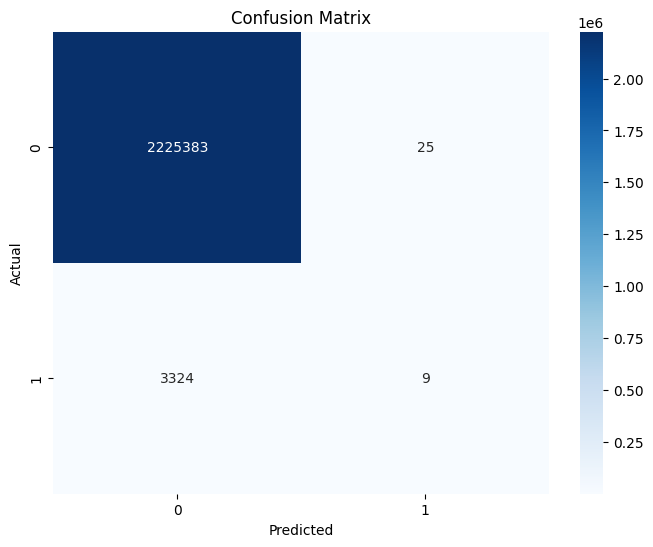

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2225408
           1       0.26      0.00      0.01      3333

    accuracy                           1.00   2228741
   macro avg       0.63      0.50      0.50   2228741
weighted avg       1.00      1.00      1.00   2228741

Accuracy Score:
0.9984973579253937
Recall Score:
0.0027002700270027003
Precision Score: 
0.2647058823529412
ROC AUC Score: 
0.8093095446064292


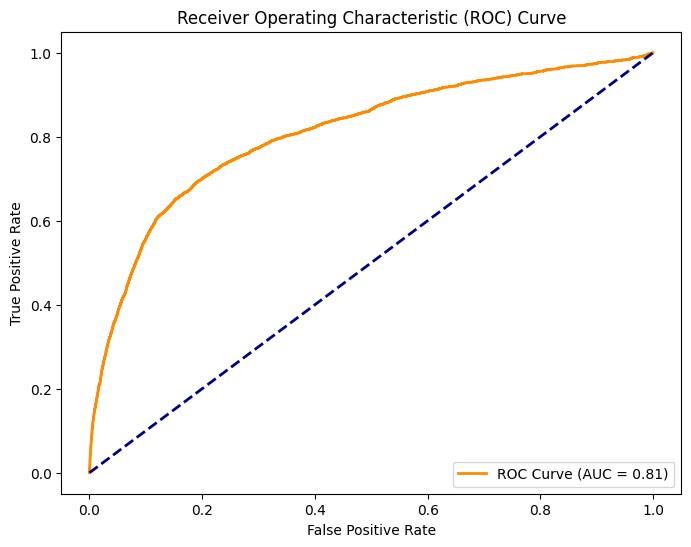

In [ ]:
plotting_function_control(log_reg_control,X_main_test,y_main_test)

#### KNN Control

In [ ]:
knn_control = KNeighborsClassifier()
knn_control.fit(X_main_train,y_main_train)

KNeighborsClassifier()

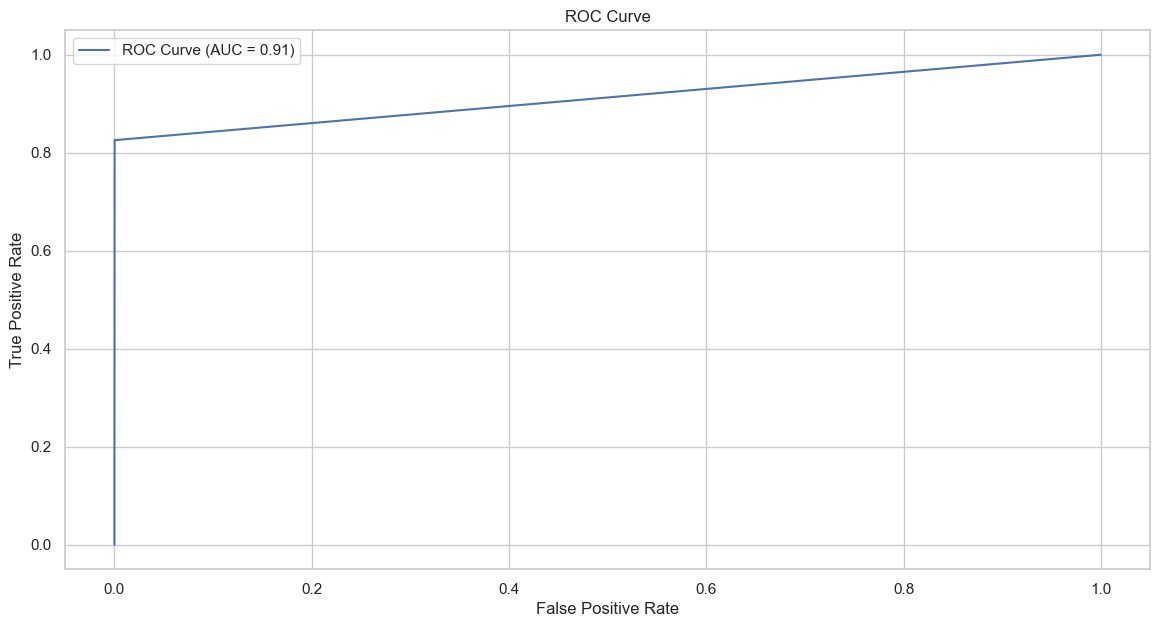


Top-performing model:

Best Parameters
Metrics:

Confusion Matrix:
[[5022    0]
 [3116  217]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.76      5022
           1       1.00      0.07      0.12      3333

    accuracy                           0.63      8355
   macro avg       0.81      0.53      0.44      8355
weighted avg       0.77      0.63      0.51      8355

Accuracy: 0.6270
Precision: 1.0000
Recall: 0.0651
F1 Score: 0.1223
ROC AUC: 0.9128
Log Loss: 2.9666



In [ ]:
plotting_function_control(knn_control,X_main_test,y_main_test)


#### Random Forest Control

In [ ]:
rf_control = RandomForestClassifier(
    n_estimators=50,        # Fewer trees for faster training
    max_depth=10,           # Limit tree depth to reduce overfitting and speed up computation
    min_samples_split=10,   # Increase minimum samples for a split to reduce tree complexity
    min_samples_leaf=5,     # Minimum samples per leaf to simplify the model
    max_features='sqrt',    # Consider only a subset of features for splits
    n_jobs=12,              # Use all available cores for parallel processing
    random_state=42         # Ensures reproducibility
)
rf_control.fit(X_main_train,y_main_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=50, n_jobs=12, random_state=42)

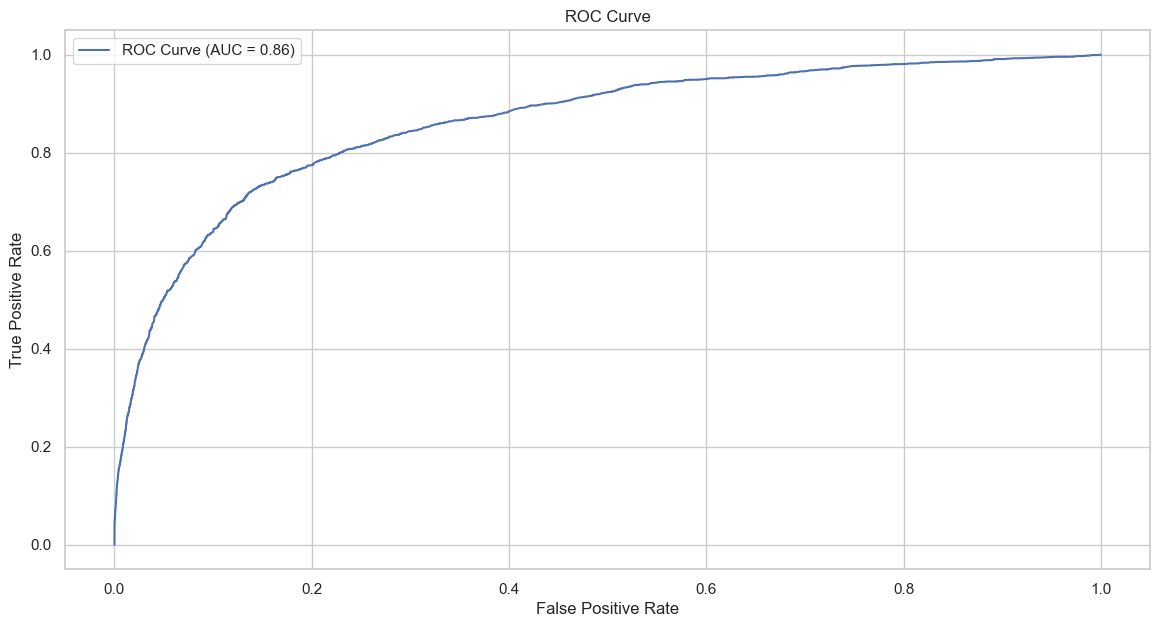


Top-performing model:

Best Parameters
Metrics:

Confusion Matrix:
[[2225408       0]
 [   3333       0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2225408
           1       0.00      0.00      0.00      3333

    accuracy                           1.00   2228741
   macro avg       0.50      0.50      0.50   2228741
weighted avg       1.00      1.00      1.00   2228741

Accuracy: 0.9985
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC: 0.8619
Log Loss: 0.0096



In [ ]:
plotting_function_control(rf_control,X_main_test,y_main_test)


####  XGBoost Control

In [ ]:
xgb_control = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_control.fit(X_main_train,y_main_train)

c:\Users\Youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:18:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

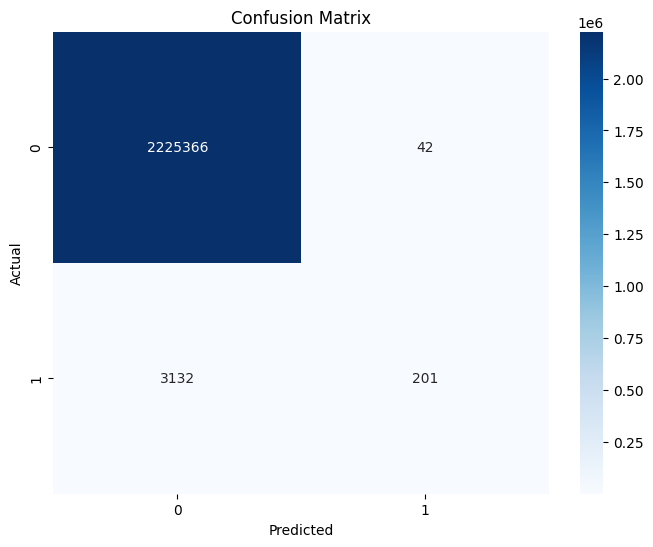

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2225408
           1       0.83      0.06      0.11      3333

    accuracy                           1.00   2228741
   macro avg       0.91      0.53      0.56   2228741
weighted avg       1.00      1.00      1.00   2228741

Accuracy Score:
0.9985758775918782
Recall Score:
0.06030603060306031
Precision Score: 
0.8271604938271605
F1 Score: 
0.11241610738255034
ROC AUC Score: 
0.9227214078992665


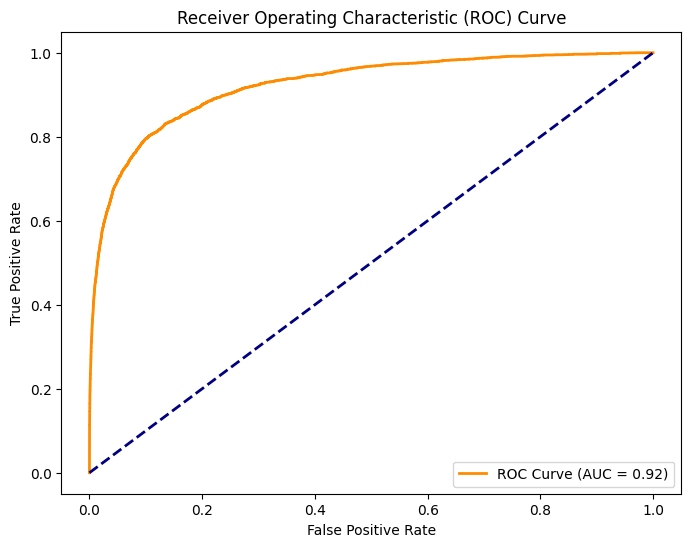

In [ ]:
plotting_function_control(xgb_control,X_main_test,y_main_test)

### Logistic Regression

_Logistic Regression is a fundamental classification algorithm that models the relationship between the input features and the probability of a binary outcome using a logistic function. It is particularly suited for problems like credit card fraud detection due to its simplicity and interpretability. Logistic Regression assumes a linear decision boundary, making it a good starting point for analyzing relationships between features and the likelihood of fraud. Its ability to output probabilities allows businesses to interpret model predictions easily and set custom thresholds for detecting fraud. Despite being less complex, it can effectively highlight important predictors, offering a baseline performance for comparison with more sophisticated models._

In [ ]:
def optimize_logistic_regression(X_train,X_test,y_train, y_test):
    param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Includes no regularization (None)
    'C': uniform(loc=0.001, scale=1000),  # Extended range for broader search space
    'solver': ['liblinear', 'lbfgs'],  # Covers all compatible solvers
    'class_weight': ['balanced', None],  # Test with and without balancing
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, None],  # Added finer granularity for ElasticNet ratio
    'max_iter': [100, 500, 1000, 5000],  # Evaluate faster vs. longer convergence
    'tol': [1e-4, 1e-3, 1e-2],  # Allows model to terminate at different accuracy levels
}
    log_reg = LogisticRegression(max_iter=5000)

    scoring = {
        'f1': 'f1',
        'accuracy': 'accuracy',
        'roc_auc': 'roc_auc'
    }
    models = {}
    for metric in ['f1', 'accuracy', 'roc_auc']:
        print(f"Optimizing for {metric}...")
        random_search = RandomizedSearchCV(
            estimator=log_reg,
            param_distributions=param_grid,
            n_iter=50,
            scoring=scoring,
            cv=cv,
            refit=metric,  # Optimize for the specific metric
            verbose=2,
            n_jobs=-1,
            random_state=42
        )

        random_search.fit(X_train, y_train)
        best_model = random_search.best_estimator_
        best_params = random_search.best_params_

        # Generate predictions and calculate metrics
        plotting_function(best_model,best_params,X_test,y_test)

    return models

Optimizing for f1...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\Youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Youss\AppD

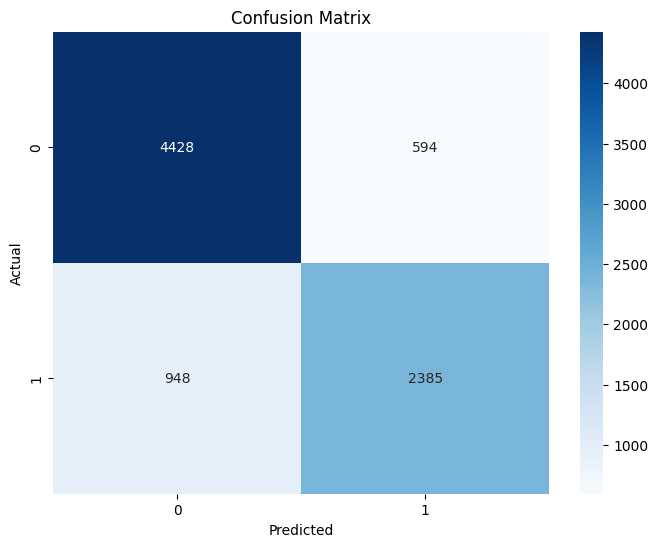

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      5022
           1       0.80      0.72      0.76      3333

    accuracy                           0.82      8355
   macro avg       0.81      0.80      0.80      8355
weighted avg       0.81      0.82      0.81      8355



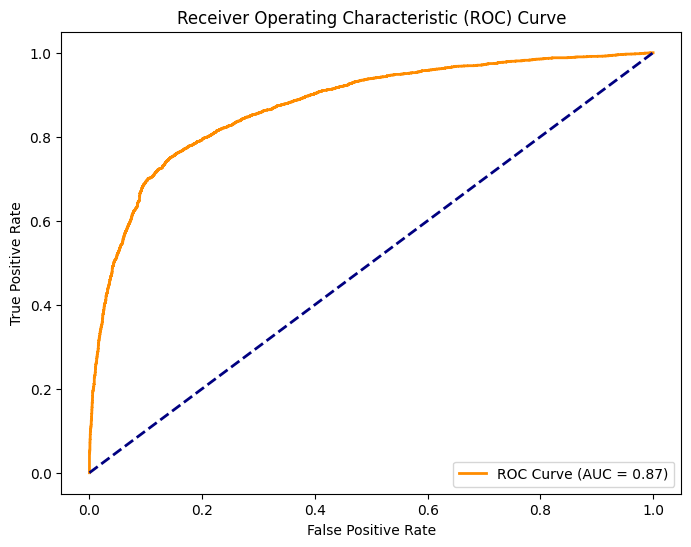

Best Parameters:
{'C': np.float64(642.0326461542877), 'class_weight': 'balanced', 'l1_ratio': 0.1, 'max_iter': 5000, 'penalty': None, 'solver': 'lbfgs', 'tol': 0.001}
Optimizing for accuracy...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\Youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Youss\AppD

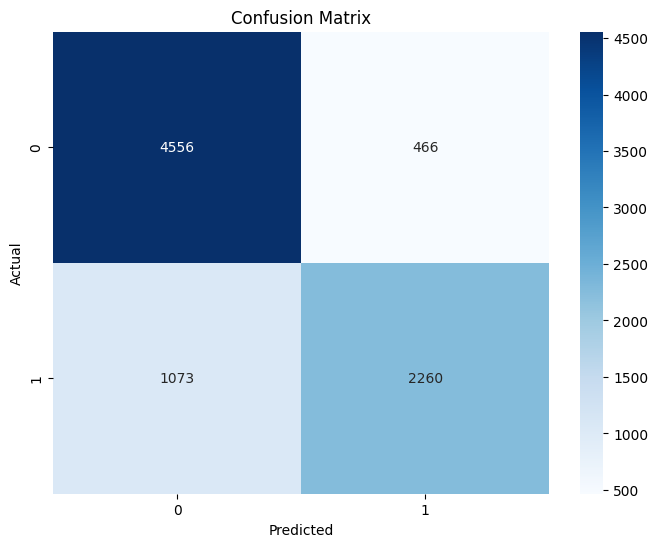

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      5022
           1       0.83      0.68      0.75      3333

    accuracy                           0.82      8355
   macro avg       0.82      0.79      0.80      8355
weighted avg       0.82      0.82      0.81      8355



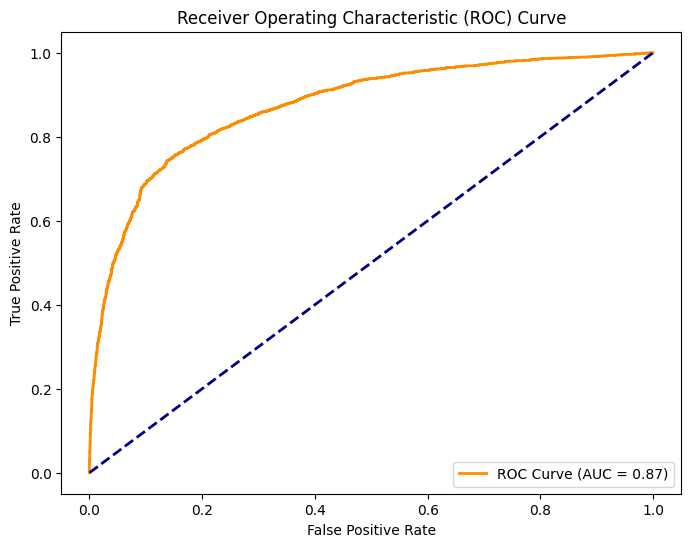

Best Parameters:
{'C': np.float64(9.198051616629646), 'class_weight': None, 'l1_ratio': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}
Optimizing for roc_auc...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\Youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Youss\AppD

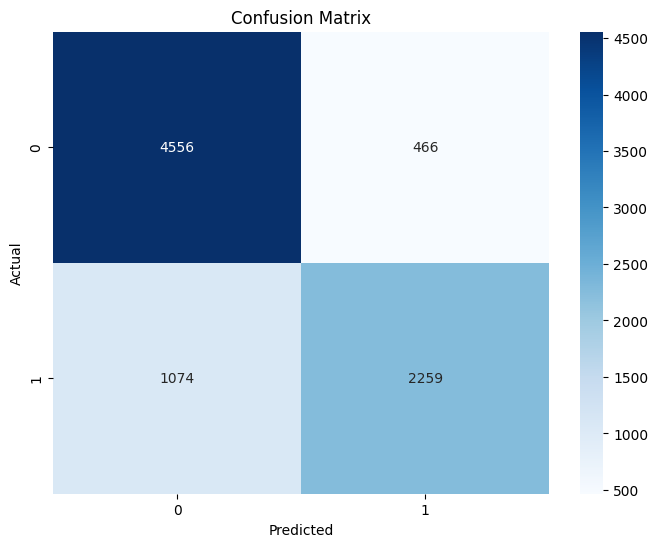

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      5022
           1       0.83      0.68      0.75      3333

    accuracy                           0.82      8355
   macro avg       0.82      0.79      0.80      8355
weighted avg       0.82      0.82      0.81      8355



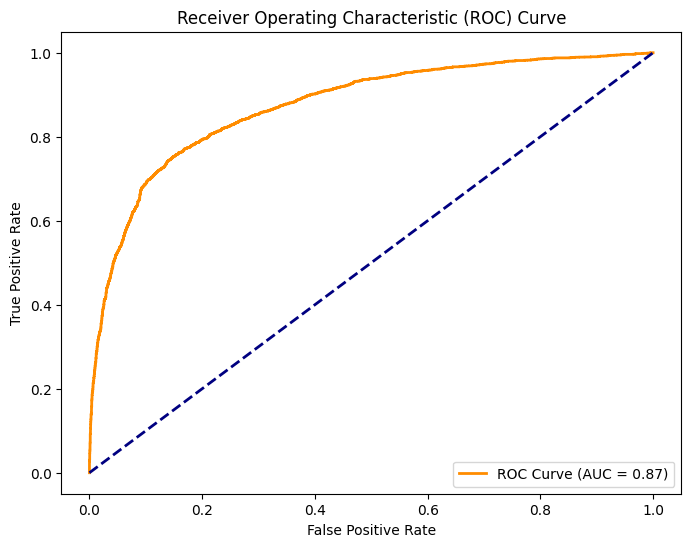

Best Parameters:
{'C': np.float64(965.256307264138), 'class_weight': None, 'l1_ratio': 0.7, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}


{}

In [ ]:
optimize_logistic_regression(X_train,X_test,y_train,y_test)

### KNN

_KNN is a non-parametric, instance-based algorithm that classifies a data point based on the majority class among its nearest neighbors in the feature space. For fraud detection, KNN can be useful in identifying fraudulent transactions that are “close” to previously seen fraud cases. It is especially relevant when the decision boundary is non-linear and patterns exist in small, localized clusters. However, KNN can be computationally expensive for large datasets like this one, and preprocessing to scale features is critical. Its strength lies in simplicity and the ability to handle multi-modal distributions in data, which can be a characteristic of fraudulent behavior._

In [ ]:
def optimize_knn(X_train, X_test, y_train, y_test):

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ])

    param_dist = {
        'knn__n_neighbors': np.arange(1, 31),
        'knn__weights': ['uniform', 'distance'],
        'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

    scorers = {
        'f1': make_scorer(f1_score),
        'roc_auc': make_scorer(roc_auc_score, needs_proba=True),
        'accuracy': make_scorer(accuracy_score)
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    models = {}
    for metric in ['f1', 'accuracy', 'roc_auc']:
        print(f"Optimizing for {metric}...")
        random_search = RandomizedSearchCV(
            pipeline,
            param_distributions=param_dist,
            n_iter=20,
            scoring=scorers,
            refit='f1',
            cv=cv,
            random_state=42,
            n_jobs = -1
        )

        random_search.fit(X_train, y_train)

        best_model = random_search.best_estimator_
        best_params = random_search.best_params_
        best_k = best_params["knn__n_neighbors"]

        plotting_function(best_model,best_params,X_test,y_test)

        models[metric] = {
            'best_model': best_model,
            'best_params': best_params,
        }

        print(f"Best k-value: {best_k}")

        # print("Best Parameters:")
        # print(best_params)

    return best_model, best_params

c:\Users\Youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Optimizing for f1...


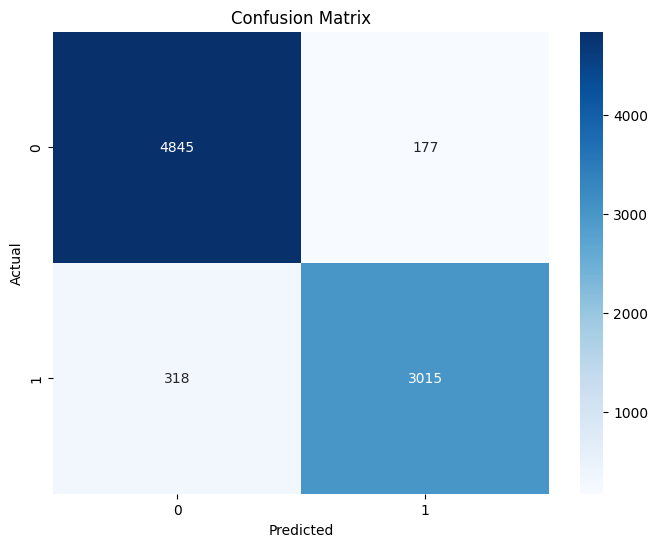

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5022
           1       0.94      0.90      0.92      3333

    accuracy                           0.94      8355
   macro avg       0.94      0.93      0.94      8355
weighted avg       0.94      0.94      0.94      8355



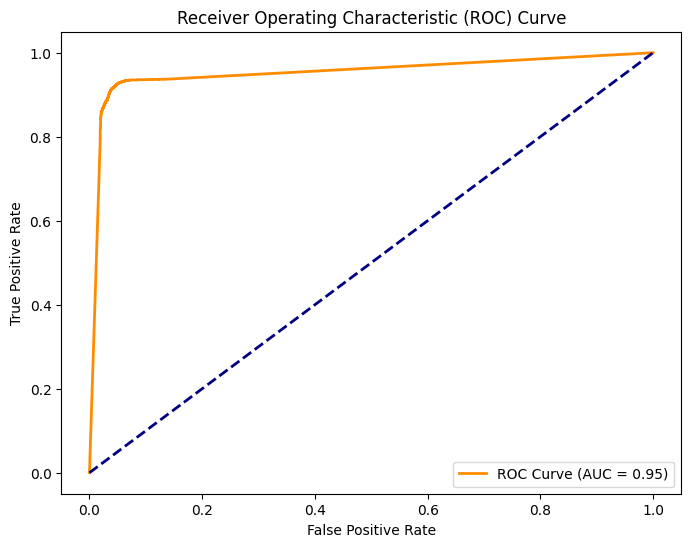

Best Parameters:
{'knn__weights': 'distance', 'knn__n_neighbors': np.int64(3), 'knn__algorithm': 'brute'}
Best k-value: 3
Optimizing for accuracy...


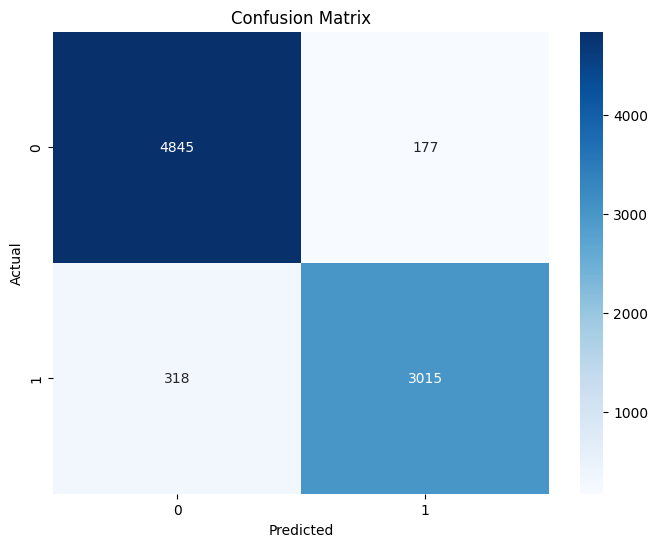

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5022
           1       0.94      0.90      0.92      3333

    accuracy                           0.94      8355
   macro avg       0.94      0.93      0.94      8355
weighted avg       0.94      0.94      0.94      8355



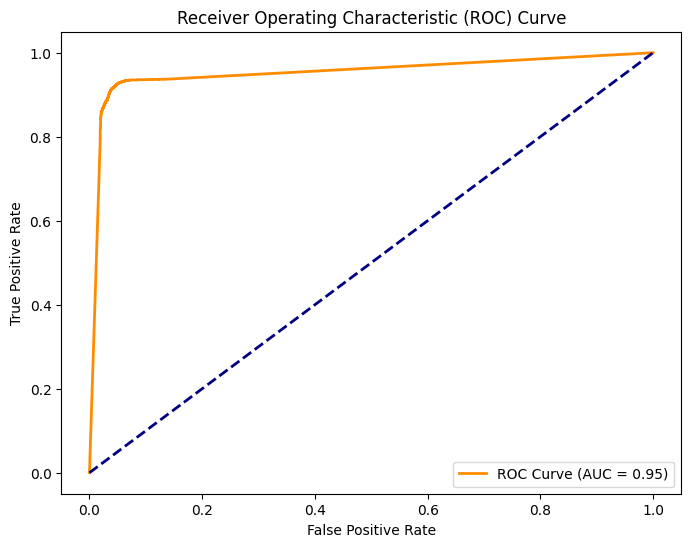

Best Parameters:
{'knn__weights': 'distance', 'knn__n_neighbors': np.int64(3), 'knn__algorithm': 'brute'}
Best k-value: 3
Optimizing for roc_auc...


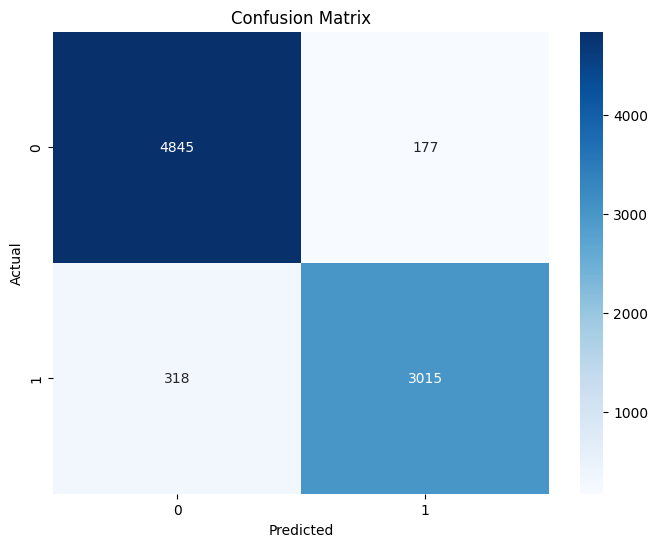

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5022
           1       0.94      0.90      0.92      3333

    accuracy                           0.94      8355
   macro avg       0.94      0.93      0.94      8355
weighted avg       0.94      0.94      0.94      8355



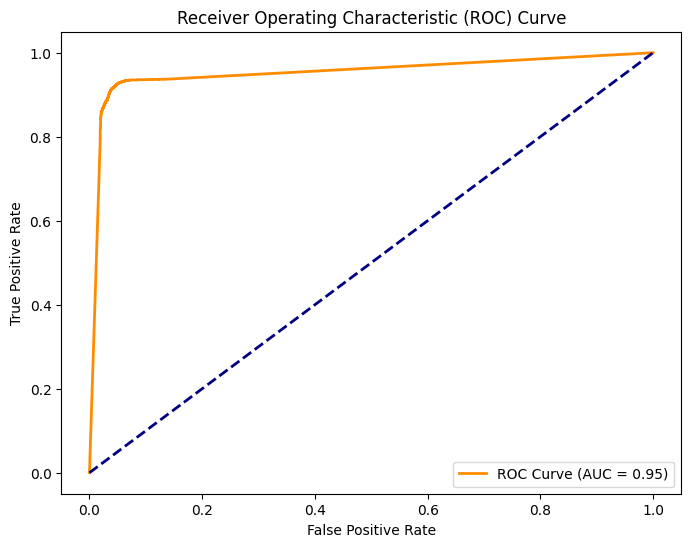

Best Parameters:
{'knn__weights': 'distance', 'knn__n_neighbors': np.int64(3), 'knn__algorithm': 'brute'}
Best k-value: 3


(Pipeline(steps=[('scaler', StandardScaler()),
                 ('knn',
                  KNeighborsClassifier(algorithm='brute',
                                       n_neighbors=np.int64(3),
                                       weights='distance'))]),
 {'knn__weights': 'distance',
  'knn__n_neighbors': np.int64(3),
  'knn__algorithm': 'brute'})

In [ ]:
optimize_knn(X_train,X_test,y_train,y_test)

### Random Forest

_Random Forest is an ensemble learning method that builds multiple decision trees during training and outputs the mode of their predictions. It is highly effective for fraud detection because of its robustness to overfitting and ability to handle large datasets with many features. Random Forest also provides feature importance, offering insights into the key factors contributing to fraud. Its ensemble approach makes it highly resistant to noise and variance, crucial when dealing with the skewed distribution of fraudulent and legitimate transactions. This model is scalable and provides reliable results, even with highly imbalanced datasets, by leveraging techniques like class weighting._

In [ ]:
# Function to perform all steps
def run_model(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(random_state=42, class_weight="balanced_subsample")
    # Randomized Search for Hyperparameter Tuning
    param_dist = {
    'n_estimators': randint(100, 1000),           # Number of trees in the forest
    'max_depth': [None] + list(range(10, 110, 10)),  # Max depth of trees, including "None" for no limit
    'min_samples_split': randint(2, 20),         # Minimum samples required to split a node
    'min_samples_leaf': randint(1, 10),          # Minimum samples required to be a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],    # Number of features to consider for the best split
    'bootstrap': [True, False],                  # Whether bootstrap samples are used when building trees
    'criterion': ['gini', 'entropy', 'log_loss'] # Splitting criteria (if using sklearn 1.1+)
    }

    models = {}
    for metric in ['f1', 'accuracy', 'roc_auc']:
        print(f"Optimizing for {metric}...")
        random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions=param_dist,
        n_iter=30,
        scoring=scoring,
        refit='accuracy',
        cv=cv,
        verbose=1,
        random_state=42,
        n_jobs= -1
    )

        random_search.fit(X_train, y_train)
        best_model = random_search.best_estimator_
        best_params = random_search.best_params_

        # Generate predictions and calculate metrics
        plotting_function(best_model,best_params,X_test,y_test)

    return models


Optimizing for f1...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\Youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

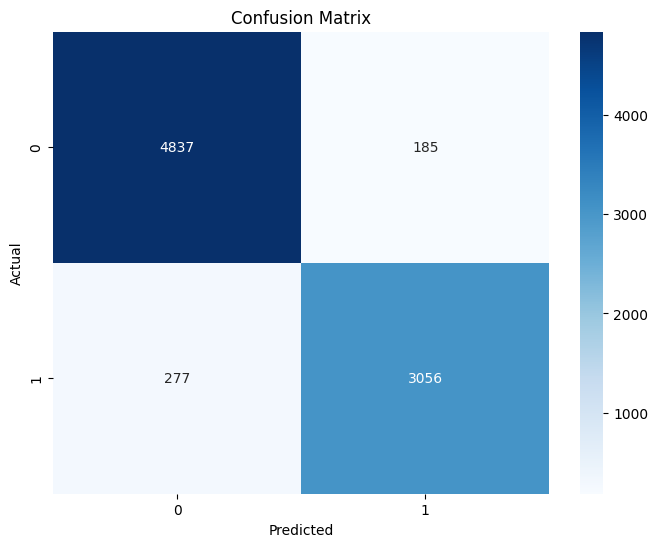

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5022
           1       0.94      0.92      0.93      3333

    accuracy                           0.94      8355
   macro avg       0.94      0.94      0.94      8355
weighted avg       0.94      0.94      0.94      8355



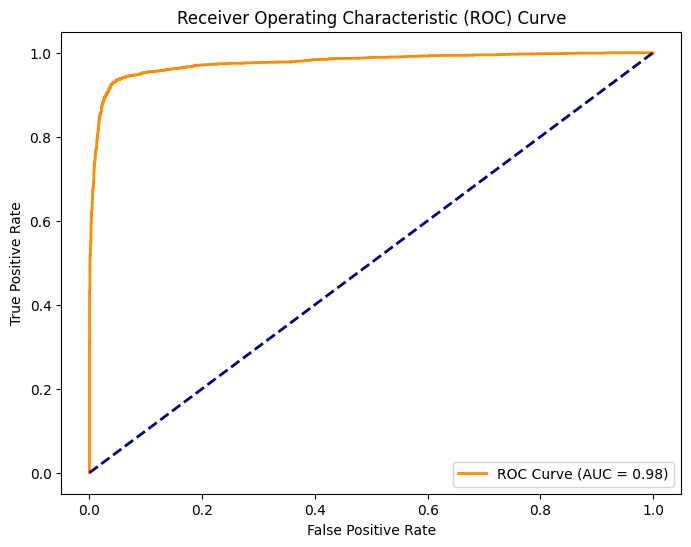

Best Parameters:
{'bootstrap': False, 'criterion': 'log_loss', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 661}
Optimizing for accuracy...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\Youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

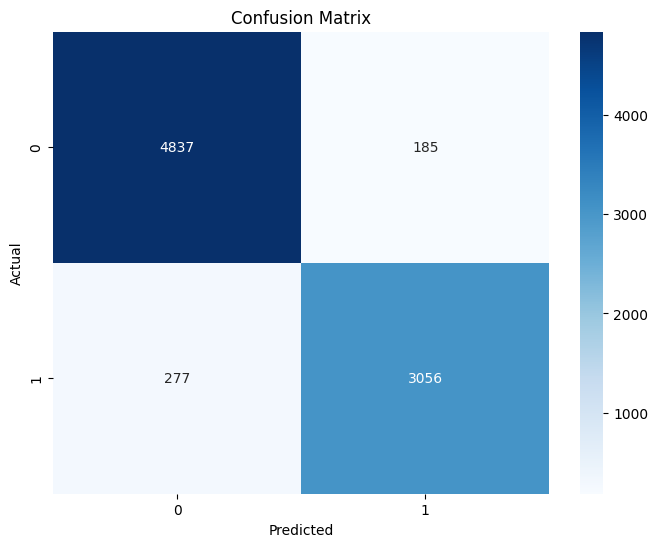

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5022
           1       0.94      0.92      0.93      3333

    accuracy                           0.94      8355
   macro avg       0.94      0.94      0.94      8355
weighted avg       0.94      0.94      0.94      8355



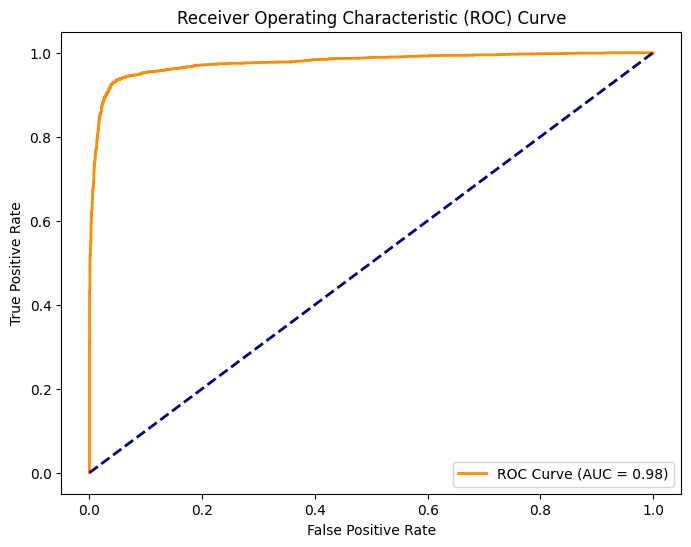

Best Parameters:
{'bootstrap': False, 'criterion': 'log_loss', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 661}
Optimizing for roc_auc...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\Youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

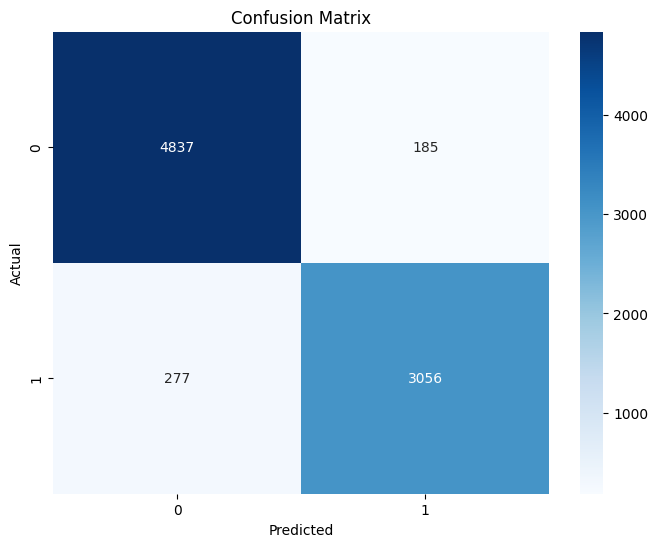

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5022
           1       0.94      0.92      0.93      3333

    accuracy                           0.94      8355
   macro avg       0.94      0.94      0.94      8355
weighted avg       0.94      0.94      0.94      8355



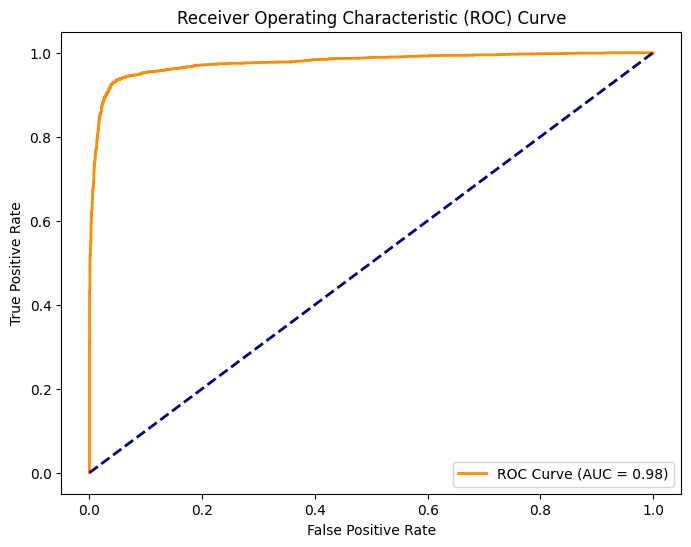

Best Parameters:
{'bootstrap': False, 'criterion': 'log_loss', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 661}


{}

In [ ]:
run_model(X_train,X_test,y_train,y_test)

### XGBoost

_XGBoost is a gradient boosting framework that builds models sequentially, minimizing errors by correcting the predictions of previous models. It is widely used in fraud detection due to its speed, scalability, and superior handling of imbalanced data. XGBoost incorporates regularization to prevent overfitting, making it a robust choice for complex datasets. Additionally, it can handle missing data and provides interpretable outputs such as feature importance scores, which are valuable for understanding fraud patterns. In the context of credit card fraud detection, XGBoost’s ability to model intricate relationships between features and its resilience to data imbalance make it one of the most effective and popular algorithms._

In [ ]:
# Define the model
def xgb_optimization(X_train, X_test, y_train, y_test):
    xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# Hyperparameter tuning using RandomizedSearchCV
    param_dist = {
    'n_estimators': [100, 200, 300],

    'learning_rate': [0.01, 0.05, 0.1, 0.2],

    'max_depth': [3, 5, 7],

    'min_child_weight': [1, 3, 5],

    'subsample': [0.6, 0.8, 1.0],

    'colsample_bytree': [0.6, 0.8, 1.0],

    'gamma': [0, 0.1, 0.2, 0.3],
}
    random_search = RandomizedSearchCV(

    estimator=xgb_model,

    param_distributions=param_dist,

    scoring='f1',

    n_iter=50,

    cv=3,

    verbose=1,

    random_state=42,

    n_jobs=-1

)
    models = {}
    for metric in ['f1', 'accuracy', 'roc_auc']:
        print(f"Optimizing for {metric}...")
        random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_dist,
        n_iter=30,
        scoring=scoring,
        refit='accuracy',
        cv=cv,
        verbose=1,
        random_state=42,
        n_jobs= 12
        )

        random_search.fit(X_train, y_train)
        best_model = random_search.best_estimator_
        best_params = random_search.best_params_

                # Generate predictions and calculate metrics
        plotting_function(best_model,best_params,X_test,y_test)
    return models

Optimizing for f1...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\Youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:12:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


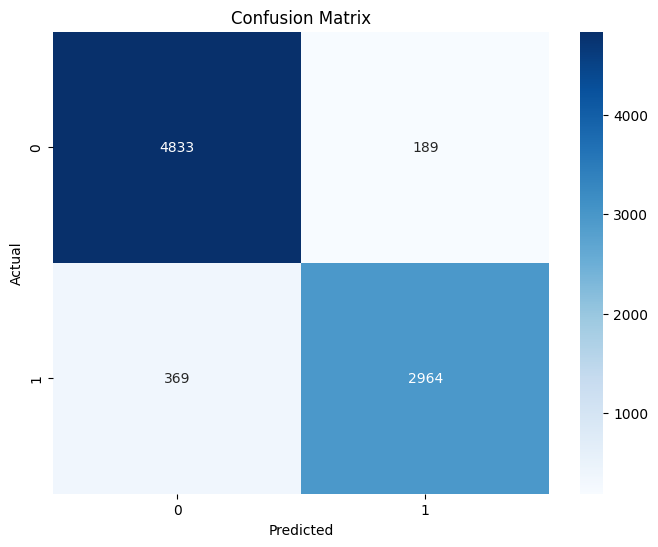

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5022
           1       0.94      0.89      0.91      3333

    accuracy                           0.93      8355
   macro avg       0.93      0.93      0.93      8355
weighted avg       0.93      0.93      0.93      8355



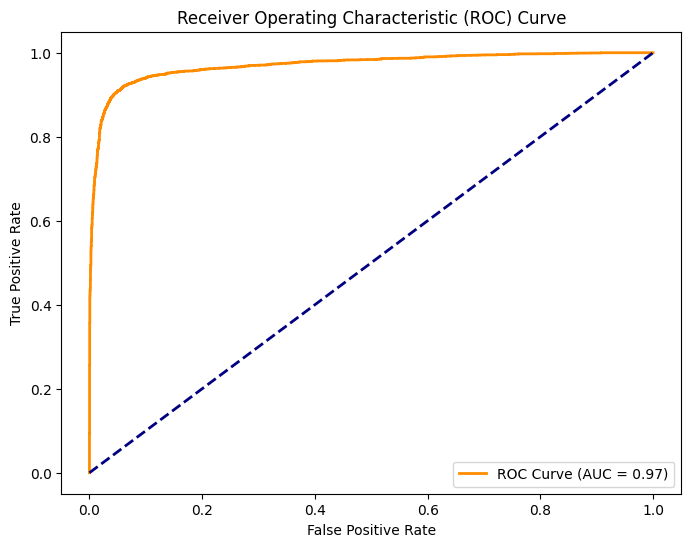

Best Parameters:
{'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 0.6}
Optimizing for accuracy...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\Youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:12:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


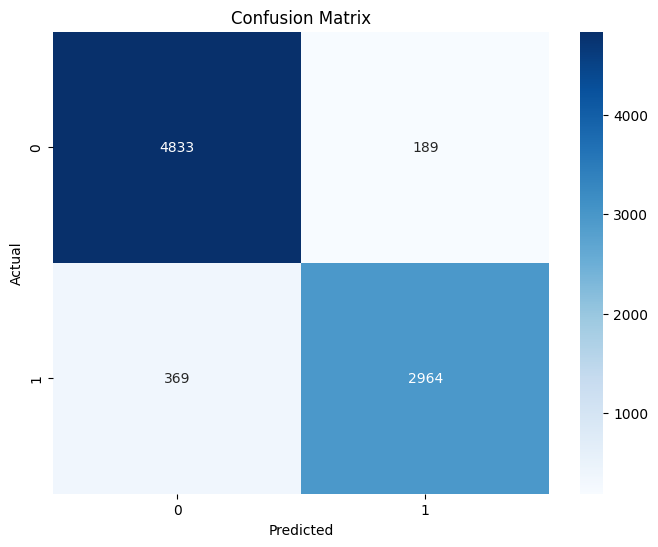

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5022
           1       0.94      0.89      0.91      3333

    accuracy                           0.93      8355
   macro avg       0.93      0.93      0.93      8355
weighted avg       0.93      0.93      0.93      8355



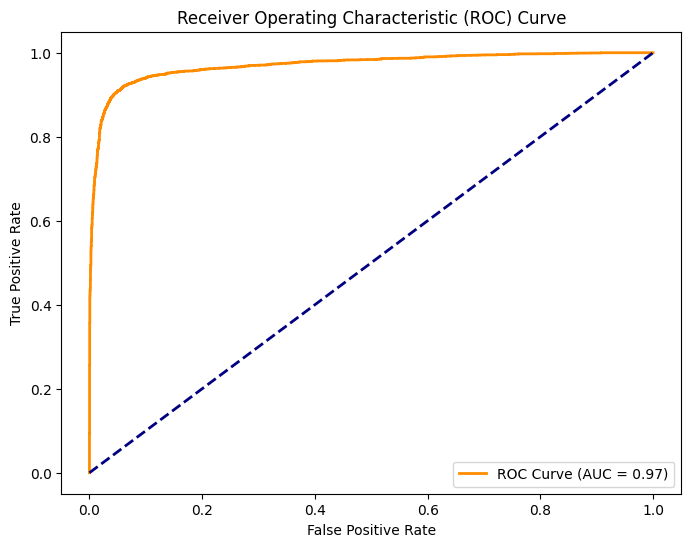

Best Parameters:
{'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 0.6}
Optimizing for roc_auc...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\Youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:13:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


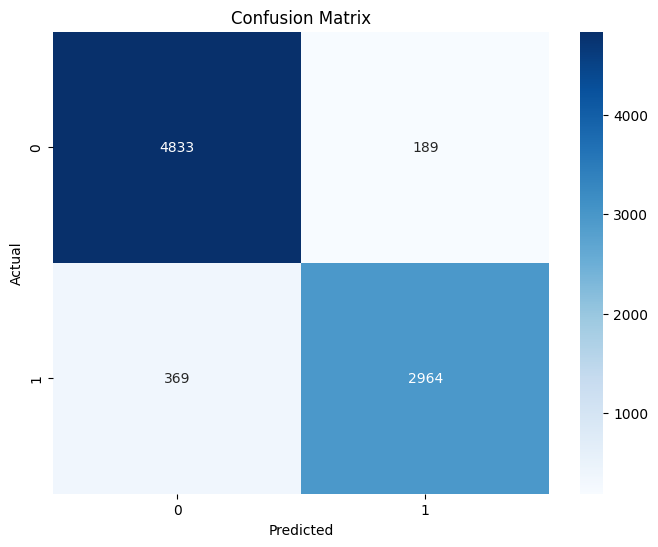

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5022
           1       0.94      0.89      0.91      3333

    accuracy                           0.93      8355
   macro avg       0.93      0.93      0.93      8355
weighted avg       0.93      0.93      0.93      8355



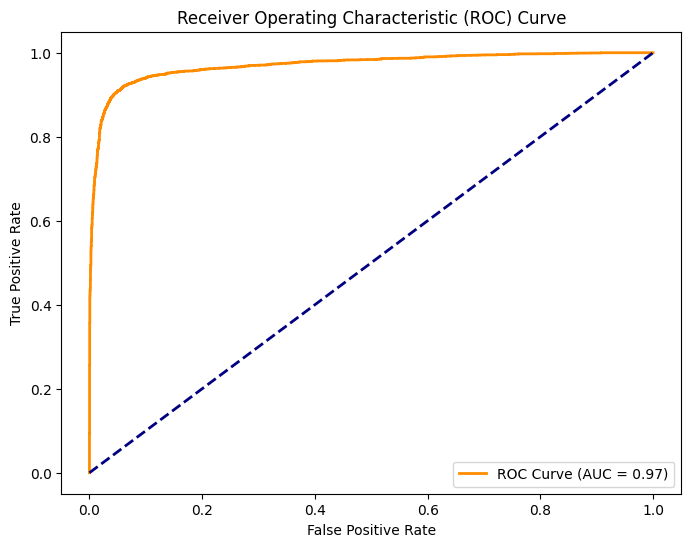

Best Parameters:
{'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 0.6}


{}

In [ ]:
xgb_optimization(X_train,X_test,y_train,y_test)

## Objective 4: Visualisation of Results:

**__Project Outcome:__** Model Performance Comparison
The project included testing different models for classification to identify fraudulent credit card transactions, such as k-nearest neighbours (KNN), logistic regression, random forest, and XGBoost. Each model's performance was assessed using metrics such as accuracy, precision, recall, F1 score, and ROC AUC. Key observations and differences between these models highlight their strengths and limitations.

**__K-nearest neighbours (KNN):__**
KNN consistently performed well, with an accuracy of 94% and a ROC AUC of 0.95. Also, with an excellent precision (95%) and a high F1-score (92%), indicating a balanced ability to reduce both false positives and false negatives. Notably, the confusion matrix remained unchanged after optimisation, demonstrating the model's stability.

**__Logistic Regression:__**
Logistic regression performed moderately, achieving an accuracy of 82% and a ROC AUC of 0.87. Optimising for different metrics revealed some variation. When optimised for F1-score, the model had a higher recall of 72%, but its precision dropped to 80%. In contrast, optimising for accuracy and ROC AUC resulted in a recall of 68%, indicating a trade-off between getting fraudulent cases and maintaining precision.

**__Random Forest:__**
Random forest was one of the best performers, with an accuracy of 94% and a ROC AUC of 0.97. It achieved high precision (94%) and recall (92%), returning an F1-score of 93%. The confusion matrix remained stable across optimisations, indicating that the model is reliable and consistent. It had the lowest false negatives which makes this the most conservative model and is the best for detecting the fraud cases

**__XGBoost:__**
XGBoost performed extremely well, with an accuracy of 93% and a ROC AUC of 0.97. It maintained high precision (94%) and recall (89%), with a strong F1-score of 91%. Its results closely matched those of random forest, demonstrating its effectiveness in fraud detection.

As the dataset was imbalanced, it meant that F1 and Accuracy was not as important, also looking at the control dataset this had high accuracy as it was trained, but it was unable to detect.

Overall, random forest and XGBoost stood out as the best models, providing high accuracy, precision, and recall while remaining consistent across metrics.

| Metric          | Logistic Reg (Control) | KNN (Control) | Random Forest (Control) | XGBoost (Control) | Logistic Reg (Optimized) | KNN (Optimized) | Random Forest (Optimized) | XGBoost (Optimized) |
|-----------------|-------------------------|---------------|--------------------------|--------------------|--------------------------|-----------------|---------------------------|---------------------|
| **F1 Score**    | 0.01                    | 0.12          | 0                        | 0.11               | 0.75                     | 0.92            | 0.93                      | 0.91                |
| **Accuracy**    | 0.99                    | 0.63          | 0.99                     | 0.99               | 0.82                     | 0.94            | 0.94                      | 0.93                |
| **Recall**      | 0.00                    | 0.07          | 0                        | 0.06               | 0.68                     | 0.90            | 0.92                      | 0.89                |
| **ROC AUC**     | 0.81                    | 0.91          | 0.86                     | 0.92               | 0.87                     | 0.95            | 0.98                      | 0.97                |
| **Precision**   | 0.26                    | 1.00          | 0                        | 0.82               | 0.83                     | 0.95            | 0.94                      | 0.94                |
| **False Negatives** | 3324                | 3116          | 3333                     | 3132               | 948                      | 318             | 277                       | 369                 |





# Conclusion (5 marks)

_Your concluding section should be around 200-400 words. It is recommended
that you divide it into the following sections._

### Achievements
_In this project, we successfully developed a machine learning framework to detect fraudulent credit card transactions. The dataset was prepared for analysis by using thorough cleaning, preprocessing, and balancing techniques. Due to the extreme imbalance in the dataset, it was clear how neccessary the under sampling and tuning techniques were. as all of the control algorithms suffer in comparison to their full ones. Then Exploratory Data Analysis provided key information about the significance of features and fraud patterns. Multiple classification models, including Random Forest and XGBoost, were tested, and both achieved high performance metrics, such as over 93% accuracy and F1-Scores greater than 91%. Models, such as Logistic Regression, performed reasonably well, but were less effective when dealing with complex, non-linear relationships.  The project demonstrated the effectiveness of combining advanced algorithms with robust preprocessing to solve fraud detection challenges. Overall for this project, the best model for fraud detection is considered to be Random Forest as it has lowest miss rate out of all the models. However, we beleive that there is room for improvement for detedction if this to be deployed. This model can be a starting point for any new customer as their behaviour and purchase patters have not yet been developed, but a specialized model for each user based on their pattern (or demographic) is indeed the way to move forward as this will be more accurate than this genaralized model._

### Limitations

_The main limitation was computational power and time. With access to better resources and more time, more time can be given to hyper parameter tune the dataset using GridSearh instead of RandomSearch. In addition, using oversampling techniques (such as SMOTE to generate more datapoints) in combination with the established techniques can also provide better results_

### Future Work

_Incorperate the rest of the unused columns, such as the location of the merchent and a timeseries analysis which due to resource limitations could not be done at the moment. Increase the size of the dataset to include more relevent datapoints and hopefully increase the performance of the model. Finally, try more models (such as SVC) which are more computationally heavy in order to find a model best suited for this task._